##  1. module import

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt    
from IPython.display import Image
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sklearn
import sys
import tensorflow as tf

print("Scikit-Learn version:", sklearn.__version__)
print("Python version:", sys.version)
print("TensorFlow version:", tf.__version__)

Scikit-Learn version: 1.3.2
Python version: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
TensorFlow version: 2.11.0


## 2. Load data

In [3]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


id: unique identifier

gender : Sex of the Patient
    
    - Male
    - Female

age : Age of the patient in Years


    
hypertension

    - 0 = if the patient doesn't have hypertension
    - 1 = if the patient has hypertension
    
heart_disease

    - 0 = if the patient doesn't have any heart diseases    
    - 1 = if the patient has a heart disease


ever_married

    - No   
    - Yes


work_type

    - children
    - Govt_jov   
    - Never_worked    
    - Private  
    - Self-employed


Residence_type

    - Rural    
    - Urban   
    - smoking_status
    
   

avg_glucose_level :average glucose level in blood


bmi: body mass index

    
smoking_status

    - never smoked  
    - formerly smoked
    - smokes
    - Unknown
    
stroke

    - 0 = if the patient had not a stroke   
    - 1 = if the patient had a stroke

## 3. Data Preprocessing (null,outlier, categorical data)

#### Handle null values

In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### Handle missing values in numerical data

In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df['bmi'] = imputer.fit_transform(df[['bmi']])
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


#### Check the number of missing values in each column

In [6]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### Handle outlier values

In [7]:
from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1, random_state=42)

# Select variables to check for outliers
columns_to_check = ['age', 'avg_glucose_level', 'bmi']

# Create a new DataFrame (to preserve the original data)
df_cleaned = df.copy()

# Perform outlier removal for each variable
for column in columns_to_check:
    # Remove rows with NaN values in the respective column -> NaN values handled earlier
    # df_cleaned = df_cleaned.dropna(subset=[column])
    
    # Fit the Isolation Forest model
    iso_forest.fit(df_cleaned[[column]])
    
    # Detect and remove outliers
    outliers = iso_forest.predict(df_cleaned[[column]])
    df_cleaned = df_cleaned.loc[outliers == 1]

# Check the DataFrame after outlier removal
df_cleaned

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.500000,Unknown,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.700000,never smoked,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.600000,Unknown,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0


#### Create boxplots for each variable before and after outlier removal

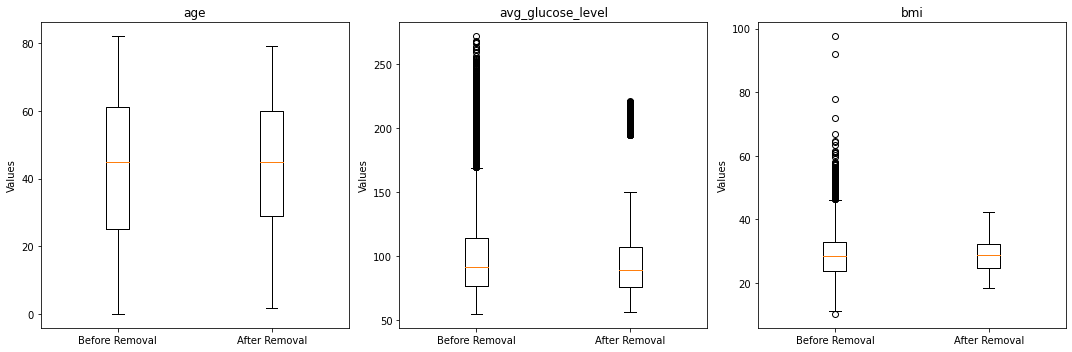

In [8]:
plt.figure(figsize=(15, 5))

for i, column in enumerate(columns_to_check, 1):
    plt.subplot(1, 3, i)
    plt.boxplot([df[column], df_cleaned[column]], labels=['Before Removal', 'After Removal'])
    plt.title(column)
    plt.ylabel('Values')

plt.tight_layout()
plt.show()


In [9]:
df = df_cleaned
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.500000,Unknown,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.700000,never smoked,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.600000,Unknown,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0


#### Original data count: 5110

#### Count of data after preprocessing: 3731


#### Handle categorical data

In [10]:
# Check categorical data
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

categorical_df = df[categorical_features]
for feature in categorical_features:
    print(f"Distribution of {feature}:")
    print(df[feature].value_counts())
    print()

Distribution of gender:
Female    2220
Male      1510
Other        1
Name: gender, dtype: int64

Distribution of ever_married:
Yes    2605
No     1126
Name: ever_married, dtype: int64

Distribution of work_type:
Private          2363
Self-employed     602
Govt_job          535
children          214
Never_worked       17
Name: work_type, dtype: int64

Distribution of Residence_type:
Urban    1883
Rural    1848
Name: Residence_type, dtype: int64

Distribution of smoking_status:
never smoked       1472
Unknown             937
formerly smoked     683
smokes              639
Name: smoking_status, dtype: int64



#### Remove outliers in gender

In [11]:
df = df[df['gender'] != 'Other']
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.500000,Unknown,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.700000,never smoked,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.600000,Unknown,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0


#### Label Encoding for Categorical Features

In [12]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to perform label encoding
label_encoding_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Initialize LabelEncoder
label_encoders = {feature: LabelEncoder() for feature in label_encoding_features}

# Apply label encoding to each categorical feature
for feature in label_encoding_features:
    df[feature] = label_encoders[feature].fit_transform(df[feature])

# Check the results
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
6,53882,1,74.0,1,1,1,2,0,70.09,27.400000,2,1
7,10434,0,69.0,0,0,0,2,1,94.39,22.800000,2,1
8,27419,0,59.0,0,0,1,2,0,76.15,28.893237,0,1
9,60491,0,78.0,0,0,1,2,1,58.57,24.200000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5101,36901,0,45.0,0,0,1,2,1,97.95,24.500000,0,0
5102,45010,0,57.0,0,0,1,2,0,77.93,21.700000,2,0
5104,14180,0,13.0,0,0,0,4,0,103.08,18.600000,0,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.600000,2,0


In [13]:
# Print the label encoded values
for feature in categorical_features:
    labels = label_encoders[feature].classes_
    encoded_labels = label_encoders[feature].transform(labels)
    print(f"Unique labels for {feature}: {list(zip(labels, encoded_labels))}")

Unique labels for gender: [('Female', 0), ('Male', 1)]
Unique labels for ever_married: [('No', 0), ('Yes', 1)]
Unique labels for work_type: [('Govt_job', 0), ('Never_worked', 1), ('Private', 2), ('Self-employed', 3), ('children', 4)]
Unique labels for Residence_type: [('Rural', 0), ('Urban', 1)]
Unique labels for smoking_status: [('Unknown', 0), ('formerly smoked', 1), ('never smoked', 2), ('smokes', 3)]


## 4. data split

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop(['id', 'stroke'], axis=1)
y = df['stroke']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Basic Modeling and Performance Evaluation

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Create scorers for performance metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Evaluate model performance using cross-validation
cv_results = cross_validate(lr, X_train, y_train, cv=5, scoring=scoring)

# Print the results
print("Train set score (5-fold cross-validation):")
print("Accuracy:", cv_results['test_accuracy'].mean())
print("Precision:", cv_results['test_precision'].mean())
print("Recall:", cv_results['test_recall'].mean())
print("F1 Score:", cv_results['test_f1'].mean())


Train set score (5-fold cross-validation):
Accuracy: 0.9574398839836767
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


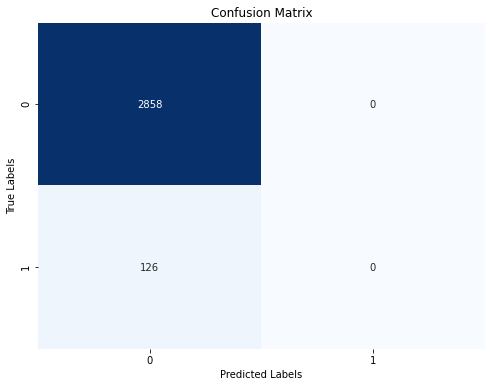

In [16]:
from sklearn.metrics import confusion_matrix

# Model prediction
y_pred = lr.predict(X_train)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### Accuracy is high, but the model is predicting all data as (Stroke=0).

#### -> Improvement is needed through data preprocessing or model optimization.

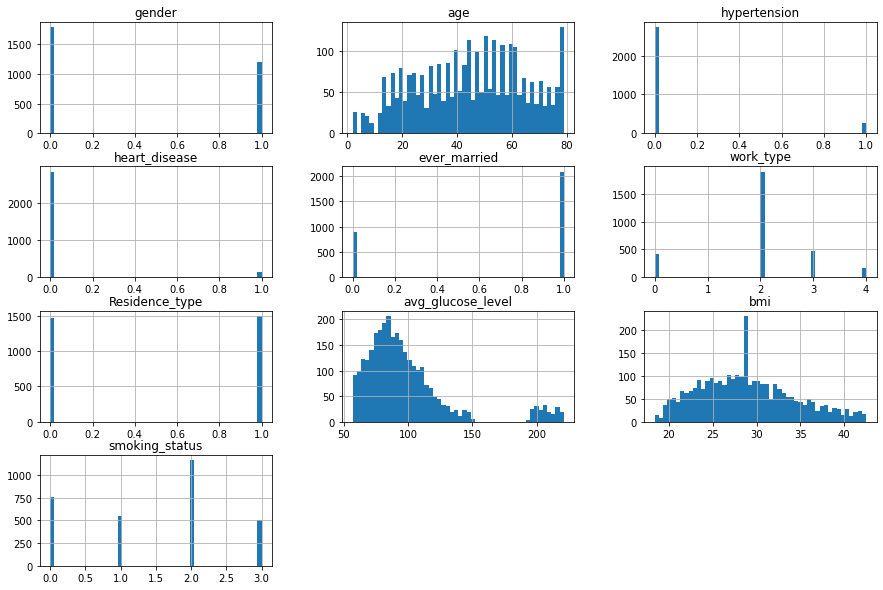

In [17]:
X_train.hist(bins=50, figsize=(15, 10))
plt.show()

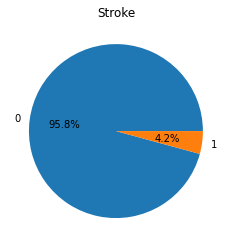

In [18]:
y.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Stroke')
plt.ylabel('')
plt.show()

imbalanced data

## 6. Preprocessing after data splliting ( Sampling, Feature Selection,Standardization)

### over sampling

In [20]:
#if there's an error, please run this code one more time
from imblearn.over_sampling import RandomOverSampler
 
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_train, y_train)
y_train = y_over
print(y_over.value_counts())

1    2858
0    2858
Name: stroke, dtype: int64


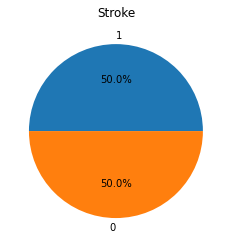

In [21]:
y_over.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Stroke')
plt.ylabel('')
plt.show()

In [22]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(random_state=42)
lr.fit(X_over, y_train)
# Evaluate model performance using cross-validation
cv_results = cross_validate(lr, X_over, y_train, cv=5, scoring=scoring)

# Print the results
print("Train set score (5-fold cross-validation):")
print("Accuracy:", cv_results['test_accuracy'].mean())
print("Precision:", cv_results['test_precision'].mean())
print("Recall:", cv_results['test_recall'].mean())
print("F1 Score:", cv_results['test_f1'].mean())

Train set score (5-fold cross-validation):
Accuracy: 0.7445755250873362
Precision: 0.7344080352324331
Recall: 0.7669589604791005
F1 Score: 0.7500410834934195


#### sampled data performs well

### Feature Selection (Information Gain) - using over-sampled data

In [23]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

# Set the number of iterations
num_iterations = 10
info_gains = []

for i in range(num_iterations):
    # Calculate information gain
    info_gain = mutual_info_classif(X_over, y_train)
    info_gains.append(info_gain)

# Calculate the average information gain for all features
avg_info_gains = np.mean(info_gains, axis=0)

# Select the top 5 features with the highest average information gain
selected_features = [x for _, x in sorted(zip(avg_info_gains, X.columns), reverse=True)[:5]]

print("Top 5 features with highest average information gain:")
print(selected_features)
print("\nAverage information gain for each feature:")
for feature, avg_info_gain in zip(X.columns, avg_info_gains):
    print(f"{feature}: {avg_info_gain}")

Top 5 features with highest average information gain:
['avg_glucose_level', 'bmi', 'age', 'hypertension', 'heart_disease']

Average information gain for each feature:
gender: 0.0008005919054811184
age: 0.2596441202126057
hypertension: 0.02664881546127622
heart_disease: 0.020484023583779275
ever_married: 0.014096373892229041
work_type: 0.01825350672629502
Residence_type: 0.0023165928933723823
avg_glucose_level: 0.5443782977059242
bmi: 0.27602692905701354
smoking_status: 0.007885329962416688


#### Create a DataFrame including the selected top 5 features

In [24]:
X_train_selected = X_over[selected_features]
X_test_selected = X_test[selected_features]
X_train_selected

,avg_glucose_level,bmi,age,hypertension,heart_disease
0,78.05,31.4,51.0,0,0
1,101.60,25.3,14.0,0,0
2,85.84,37.3,46.0,0,0
3,85.64,32.0,45.0,0,0
4,91.63,33.5,78.0,1,0
...,...,...,...,...,...
5711,89.22,37.8,60.0,0,0
5712,70.09,27.4,74.0,1,1
5713,213.03,20.2,60.0,1,0
5714,110.52,28.5,57.0,0,0


In [25]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_selected, y_train)

cv_results = cross_validate(lr, X_train_selected, y_train, cv=5, scoring=scoring)

# Print the results
print("Train set score (5-fold cross-validation):")
print("Accuracy:", cv_results['test_accuracy'].mean())
print("Precision:", cv_results['test_precision'].mean())
print("Recall:", cv_results['test_recall'].mean())
print("F1 Score:", cv_results['test_f1'].mean())

Train set score (5-fold cross-validation):
Accuracy: 0.7417769457139535
Precision: 0.72713437133664
Recall: 0.7743077412954821
F1 Score: 0.7498580933421345


#### Using only the top 5 features with the highest information gain yields better results 

### Standardization 

In [26]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object for standardization
scaler = StandardScaler()

# Standardize the training data
X_train_scaled = scaler.fit_transform(X_train_selected)

# Standardize the test data
X_test_scaled = scaler.transform(X_test_selected)

In [27]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)
cv_results = cross_validate(lr, X_train_scaled, y_train, cv=5, scoring=scoring)

# Print the results
print("Train set score (5-fold cross-validation):")
print("Accuracy:", cv_results['test_accuracy'].mean())
print("Precision:", cv_results['test_precision'].mean())
print("Recall:", cv_results['test_recall'].mean())
print("F1 Score:", cv_results['test_f1'].mean())

Train set score (5-fold cross-validation):
Accuracy: 0.7426518363526238
Precision: 0.7277640470907125
Recall: 0.775708792083573
F1 Score: 0.7508595999510771


#### Standardization results in no difference in performance
#### -> However, standardized data is used for improved model training speed

#### Preprocessing result: Over Sampling + Top 5 features with the highest information gain + Standardization

## 7. Model Optimization 1 to 14

MLP

In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create an MLPClassifier instance
mlp = MLPClassifier(random_state=42)

# Set the hyperparameter grid
parameter_space = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant'],
}

# Initialize GridSearchCV (Grid search uses k-fold validation by default)
grid_search = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)

# Train the model and search for the optimal hyperparameters based on the data
grid_search.fit(X_train_scaled, y_train)

# Print the optimal hyperparameters and performance
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

# Use the best model for prediction
best_model_mlp = grid_search.best_estimator_


# Create a custom scorer for performance evaluation
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

# Performance evaluation using cross-validation
cv_results = cross_validate(best_model_mlp, X_train_scaled, y_train, cv=5, scoring=scoring)

# Performance metrics
avg_accuracy_mlp = cv_results['test_accuracy'].mean()
avg_precision_mlp = cv_results['test_precision'].mean()
avg_recall_mlp = cv_results['test_recall'].mean()
avg_f1_mlp = cv_results['test_f1'].mean()

# Print cross-validation results
print("\nMLP Performance (Optimal Model, Cross-validation):")
print("Average Accuracy:", avg_accuracy_mlp)
print("Average Precision:", avg_precision_mlp)
print("Average Recall:", avg_recall_mlp)
print("Average F1 Score:",avg_f1_mlp)

Best parameters found:  {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Best cross-validation accuracy:  0.8994033307025433

MLP Performance (Optimal Model, Cross-validation):
Average Accuracy: 0.8994033307025433
Average Precision: 0.9078128378214775
Average Recall: 0.8994011242697757
Average F1 Score: 0.8988671555295877


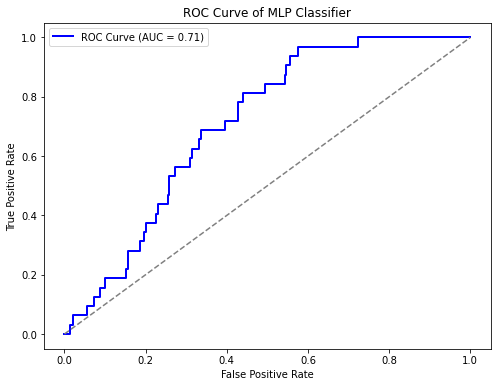

AUC of MLP Classifier: 0.7089460784313726
Loss of MLP Classifier: 0.43702606706447467


In [29]:
from sklearn.metrics import roc_curve, auc, log_loss

# Calculate predicted probabilities
y_pred_prob_mlp = best_model_mlp.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC Curve
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_pred_prob_mlp)

# Calculate AUC
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# Calculate Loss
loss_mlp = log_loss(y_test, y_pred_prob_mlp)

# Visualize ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_mlp, tpr_mlp, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of MLP Classifier')
plt.legend()
plt.show()

# Print AUC and Loss
print("AUC of MLP Classifier:", roc_auc_mlp)
print("Loss of MLP Classifier:", loss_mlp)

Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create logistic regression model
logistic_reg = LogisticRegression(random_state=42)

# Set hyperparameter grid
parameter_space = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

# Initialize GridSearchCV (Grid search uses k-fold validation by default)
grid_search = GridSearchCV(logistic_reg, parameter_space, n_jobs=-1, cv=5, scoring='accuracy')

# Train the model and search for the optimal hyperparameters based on the data
grid_search.fit(X_train_scaled, y_train)

# Print the optimal hyperparameters and performance
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

# Use the best model for prediction
best_model_lr = grid_search.best_estimator_

# Performance evaluation using cross-validation
cv_results = cross_validate(best_model_lr, X_train_scaled, y_train, cv=5, scoring=scoring)

# Performance metrics
avg_accuracy_lr = cv_results['test_accuracy'].mean()
avg_precision_lr = cv_results['test_precision'].mean()
avg_recall_lr = cv_results['test_recall'].mean()
avg_f1_lr = cv_results['test_f1'].mean()

# Print cross-validation results
print("\nLR Performance (Optimal Model, Cross-validation):")
print("Average Accuracy:", avg_accuracy_lr)
print("Average Precision:", avg_precision_lr)
print("Average Recall:", avg_recall_lr)
print("Average F1 Score:",avg_f1_lr)

Best parameters found:  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation accuracy:  0.7426518363526238

LR Performance (Optimal Model, Cross-validation):
Average Accuracy: 0.7426518363526238
Average Precision: 0.7438857347298639
Average Recall: 0.7426460142309529
Average F1 Score: 0.742321710230979


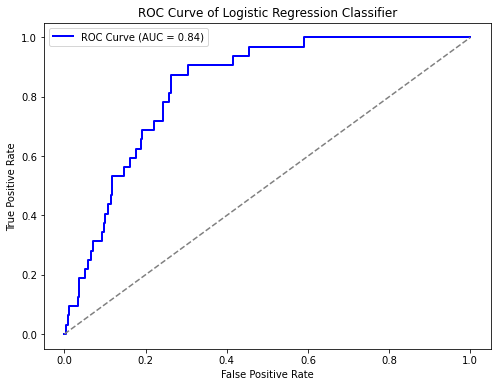

AUC of Logistic Regression Classifier: 0.8363532913165266
Loss of Logistic Regression Classifier: 0.505385628167851


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, log_loss
import matplotlib.pyplot as plt

# Calculate predicted probabilities
y_pred_prob_logistic_regression = best_model_lr.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC Curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_logistic_regression)

# Calculate AUC
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Calculate Loss
loss_lr = log_loss(y_test, y_pred_prob_logistic_regression)

# Visualize ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Logistic Regression Classifier')
plt.legend()
plt.show()

# Print AUC and Loss
print("AUC of Logistic Regression Classifier:", roc_auc_lr)
print("Loss of Logistic Regression Classifier:", loss_lr)

Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Set hyperparameter grid
parameter_space = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV (Grid search uses k-fold validation by default)
grid_search = GridSearchCV(decision_tree, parameter_space, n_jobs=-1, cv=5, scoring='accuracy')

# Train the model and search for the optimal hyperparameters based on the data
grid_search.fit(X_train_scaled, y_train)

# Print the optimal hyperparameters and performance
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

# Use the best model for prediction
best_model_dt = grid_search.best_estimator_

# Performance evaluation using cross-validation
cv_results = cross_validate(best_model_dt, X_train_scaled, y_train, cv=5, scoring=scoring)

# Performance metrics
avg_accuracy_dt = cv_results['test_accuracy'].mean()
avg_precision_dt = cv_results['test_precision'].mean()
avg_recall_dt = cv_results['test_recall'].mean()
avg_f1_dt = cv_results['test_f1'].mean()

# Print cross-validation results
print("\nDT Performance (Optimal Model, Cross-validation):")
print("Average Accuracy:", avg_accuracy_dt)
print("Average Precision:", avg_precision_dt)
print("Average Recall:", avg_recall_dt)
print("Average F1 Score:",avg_f1_dt)

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation accuracy:  0.9765572135650876

DT Performance (Optimal Model, Cross-validation):
Average Accuracy: 0.9765572135650876
Average Precision: 0.9776475214738083
Average Recall: 0.9765541376311953
Average F1 Score: 0.9765424095744631


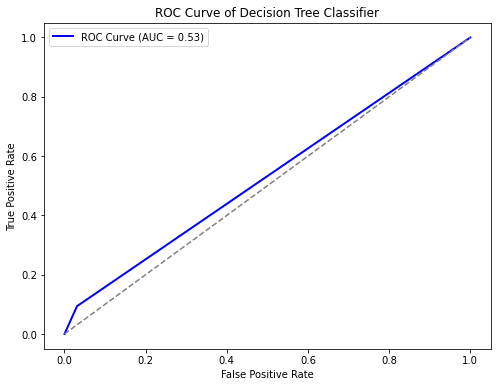

AUC of Decision Tree Classifier: 0.5314688375350141
Loss of Decision Tree Classifier: 2.4641103523391084


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, log_loss
import matplotlib.pyplot as plt

# Calculate predicted probabilities
y_pred_prob_decision_tree = best_model_dt.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC Curve
fpr_dt, tpr_dt, thresholds_decision_tree = roc_curve(y_test, y_pred_prob_decision_tree)

# Calculate AUC
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Calculate Loss
loss_dt = log_loss(y_test, y_pred_prob_decision_tree)

# Visualize ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Decision Tree Classifier')
plt.legend()
plt.show()

# Print AUC and Loss
print("AUC of Decision Tree Classifier:", roc_auc_dt)
print("Loss of Decision Tree Classifier:", loss_dt)

SVM

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Create SVC model
svc = SVC(random_state=42)

# Set hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'linear']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Train the model and search for the optimal hyperparameters
grid_search.fit(X_train_scaled, y_train)

# Print the optimal hyperparameters
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

# Use the best model for prediction
best_model_svc = grid_search.best_estimator_

# Performance evaluation using cross-validation
cv_results = cross_validate(best_model_svc, X_train_scaled, y_train, cv=5, scoring=scoring)

# Performance metrics
avg_accuracy_svc = cv_results['test_accuracy'].mean()
avg_precision_svc = cv_results['test_precision'].mean()
avg_recall_svc = cv_results['test_recall'].mean()
avg_f1_svc = cv_results['test_f1'].mean()

# Print cross-validation results
print("\nSVC Performance (Optimal Model, Cross-validation):")
print("Average Accuracy:", avg_accuracy_svc)
print("Average Precision:", avg_precision_svc)
print("Average Recall:", avg_recall_svc)
print("Average F1 Score:",avg_f1_svc)

Best parameters found:  {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best cross-validation accuracy:  0.8763106534760077

SVC Performance (Optimal Model, Cross-validation):
Average Accuracy: 0.8763106534760077
Average Precision: 0.8888379873963423
Average Recall: 0.8763009319927008
Average F1 Score: 0.8752946633300691


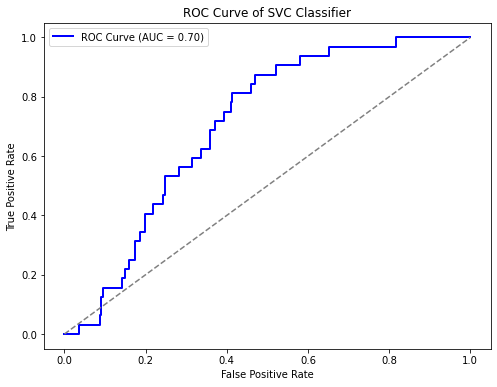

AUC of SVC Classifier: 0.7039565826330532
Loss of SVC Classifier: 4.165706444385662


In [36]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, log_loss
import matplotlib.pyplot as plt

# Calculate predicted probabilities using decision_function (SVM does not support probability)
y_pred_prob_svc = best_model_svc.decision_function(X_test_scaled)

# Calculate ROC Curve
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y_pred_prob_svc)

# Calculate AUC
roc_auc_svc = auc(fpr_svc, tpr_svc)

# Calculate Loss
loss_svc = log_loss(y_test, y_pred_prob_svc)

# Visualize ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_svc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of SVC Classifier')
plt.legend()
plt.show()

# Print AUC and Loss
print("AUC of SVC Classifier:", roc_auc_svc)
print("Loss of SVC Classifier:", loss_svc)

Gaussian Naïve Baye

In [37]:

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Create a Gaussian Naïve Bayes model
naive_bayes = GaussianNB()

# Set up the hyperparameter grid for exploration
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Initialize the grid search
grid_search = GridSearchCV(naive_bayes, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Train the model and search for the best hyperparameters
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters found
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

# Use the best model for prediction
best_model_nb = grid_search.best_estimator_


# Evaluate the performance using cross-validation
cv_results = cross_validate(best_model_nb, X_train_scaled, y_train, cv=5, scoring=scoring)

# Performance evaluation
avg_accuracy_nb = cv_results['test_accuracy'].mean()
avg_precision_nb = cv_results['test_precision'].mean()
avg_recall_nb = cv_results['test_recall'].mean()
avg_f1_nb = cv_results['test_f1'].mean()

# Print the evaluation results
print("\nNB Performance (Best Model, Cross-Validation):")
print("Average Accuracy:", avg_accuracy_nb)
print("Average Precision:", avg_precision_nb)
print("Average Recall:", avg_recall_nb)
print("Average F1 Score:",avg_f1_nb)

Best parameters found:  {'var_smoothing': 1e-09}
Best cross-validation accuracy:  0.6773937130236343

NB Performance (Best Model, Cross-Validation):
Average Accuracy: 0.6773937130236343
Average Precision: 0.7000848196287055
Average Recall: 0.6773875424050555
Average F1 Score: 0.6678129753829865


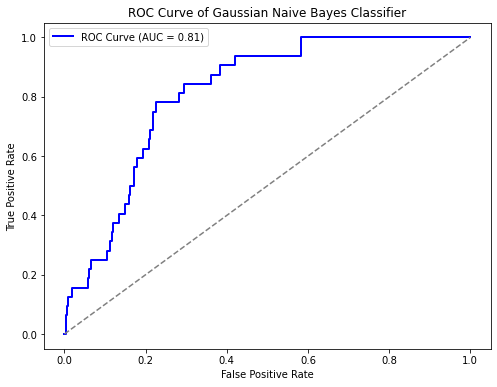

AUC of Gaussian Naive Bayes Classifier: 0.812937675070028
Loss of Gaussian Naive Bayes Classifier: 0.8553512392658277


In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, log_loss
import matplotlib.pyplot as plt

# Predicted probabilities calculation
y_pred_prob_gnb = best_model_nb.predict_proba(X_test_scaled)[:, 1]

# ROC Curve calculation
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, y_pred_prob_gnb)

# AUC calculation
roc_auc_nb = auc(fpr_gnb, tpr_gnb)

# Loss calculation
loss_nb = log_loss(y_test, y_pred_prob_gnb)

# ROC Curve visualization
plt.figure(figsize=(8, 6))
plt.plot(fpr_gnb, tpr_gnb, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Gaussian Naive Bayes Classifier')
plt.legend()
plt.show()

# AUC and Loss output
print("AUC of Gaussian Naive Bayes Classifier:", roc_auc_nb)
print("Loss of Gaussian Naive Bayes Classifier:", loss_nb)

KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# KNN model instantiation
knn = KNeighborsClassifier()

# Hyperparameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Grid search initialization
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Model training and hyperparameter optimization using grid search
grid_search_knn.fit(X_train_scaled, y_train)

# Best hyperparameters output
print("Best parameters found: ", grid_search_knn.best_params_)
print("Best cross-validation accuracy: ", grid_search_knn.best_score_)

# Prediction using the best model
best_model_knn = grid_search_knn.best_estimator_

# Performance evaluation using cross-validation
cv_results = cross_validate(best_model_knn, X_train_scaled, y_train, cv=5, scoring=scoring)

# Performance metrics
avg_accuracy_knn = cv_results['test_accuracy'].mean()
avg_precision_knn = cv_results['test_precision'].mean()
avg_recall_knn = cv_results['test_recall'].mean()
avg_f1_knn = cv_results['test_f1'].mean()

# Cross-validation results output
print("\nKNN Performance (Best Model, Cross-Validation):")
print("Average Accuracy:", avg_accuracy_knn)
print("Average Precision:", avg_precision_knn)
print("Average Recall:", avg_recall_knn)
print("Average F1 Score:",avg_f1_knn)

Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation accuracy:  0.9625612576399977

KNN Performance (Best Model, Cross-Validation):
Average Accuracy: 0.9625612576399977
Average Precision: 0.9651703406621925
Average Recall: 0.9625613878240848
Average F1 Score: 0.9625086241876701


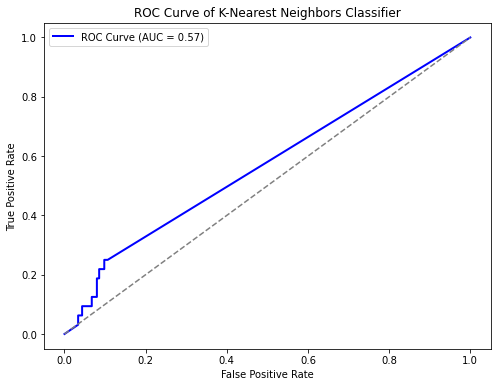

AUC of K-Nearest Neighbors Classifier: 0.569327731092437
Loss of K-Nearest Neighbors Classifier: 2.3741169830298383


In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, log_loss
import matplotlib.pyplot as plt

# Calculate the prediction probabilities
y_pred_prob_knn = best_model_knn.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC Curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_prob_knn)

# Calculate the AUC
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Calculate the loss
loss_knn = log_loss(y_test, y_pred_prob_knn)

# Visualize the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of K-Nearest Neighbors Classifier')
plt.legend()
plt.show()

# Output the AUC and Loss
print("AUC of K-Nearest Neighbors Classifier:", roc_auc_knn)
print("Loss of K-Nearest Neighbors Classifier:", loss_knn)

Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create the Random Forest model
random_forest = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the grid search
grid_search_rf = GridSearchCV(random_forest, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Train the model and search for the best hyperparameters using grid search
grid_search_rf.fit(X_train_scaled, y_train)

# Output the best hyperparameters
print("Best parameters found: ", grid_search_rf.best_params_)
print("Best cross-validation accuracy: ", grid_search_rf.best_score_)

# Use the best model to make predictions
best_model_rf = grid_search_rf.best_estimator_

# Perform cross-validation for performance evaluation
cv_results = cross_validate(best_model_rf, X_train_scaled, y_train, cv=5, scoring=scoring)

# Evaluate performance
avg_accuracy_rf = cv_results['test_accuracy'].mean()
avg_precision_rf = cv_results['test_precision'].mean()
avg_recall_rf = cv_results['test_recall'].mean()
avg_f1_rf = cv_results['test_f1'].mean()

# Output the cross-validation results
print("\nRF Performance (Best Model, Cross-Validation):")
print("Average Accuracy:", avg_accuracy_rf)
print("Average Precision:", avg_precision_rf)
print("Average Recall:", avg_recall_rf)
print("Average F1 Score:",avg_f1_rf)

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation accuracy:  0.9900283880598841

RF Performance (Best Model, Cross-Validation):
Average Accuracy: 0.9900283880598841
Average Precision: 0.9902385112728668
Average Recall: 0.9900279230401822
Average F1 Score: 0.9900271250119032


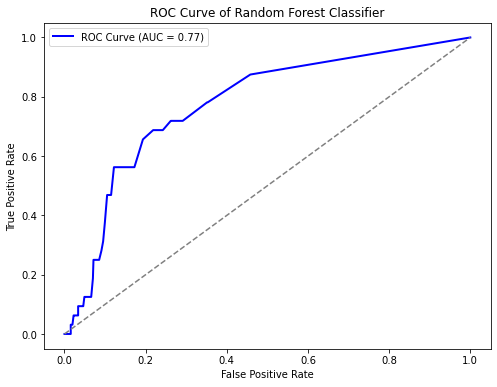

AUC of Random Forest Classifier: 0.7745535714285715
Loss of Random Forest Classifier: 0.3382037795257551


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, log_loss
import matplotlib.pyplot as plt

# Calculate the predicted probabilities
y_pred_prob_rf = best_model_rf.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)

# Calculate the AUC
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Calculate the loss
loss_rf = log_loss(y_test, y_pred_prob_rf)

# Visualize the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Random Forest Classifier')
plt.legend()
plt.show()

# Output the AUC and Loss
print("AUC of Random Forest Classifier:", roc_auc_rf)
print("Loss of Random Forest Classifier:", loss_rf)

AdaBoost

In [43]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Create the AdaBoost model
adaboost = AdaBoostClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Initialize the grid search
grid_search_ab = GridSearchCV(adaboost, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Train the model and search for the best hyperparameters using grid search
grid_search_ab.fit(X_train_scaled, y_train)

# Output the best hyperparameters
print("Best parameters found: ", grid_search_ab.best_params_)
print("Best cross-validation accuracy: ", grid_search_ab.best_score_)

# Use the best model to make predictions
best_model_ab = grid_search_ab.best_estimator_

# Perform cross-validation for performance evaluation
cv_results = cross_validate(best_model_ab, X_train_scaled, y_train, cv=5, scoring=scoring)

# Evaluate performance
avg_accuracy_ab = cv_results['test_accuracy'].mean()
avg_precision_ab = cv_results['test_precision'].mean()
avg_recall_ab = cv_results['test_recall'].mean()
avg_f1_ab = cv_results['test_f1'].mean()

# Output the cross-validation results
print("\nAB Performance (Best Model, Cross-Validation):")
print("Average Accuracy:", avg_accuracy_ab)
print("Average Precision:", avg_precision_ab)
print("Average Recall:", avg_recall_ab)
print("Average F1 Score:",avg_f1_ab)

Best parameters found:  {'learning_rate': 1.0, 'n_estimators': 150}
Best cross-validation accuracy:  0.8325772871048462

AB Performance (Best Model, Cross-Validation):
Average Accuracy: 0.8325772871048462
Average Precision: 0.8352373946379827
Average Recall: 0.8325692258704518
Average F1 Score: 0.8322469524561467


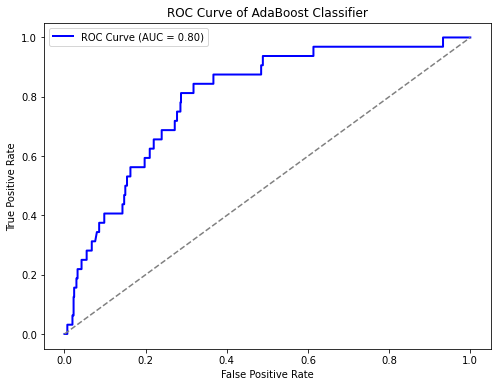

AUC of AdaBoost Classifier: 0.795890231092437
Loss of AdaBoost Classifier: 0.6733765896884015


In [44]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, auc, log_loss
import matplotlib.pyplot as plt

# Calculate predicted probabilities
y_pred_prob_adaboost = best_model_ab.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC Curve
fpr_adaboost, tpr_adaboost, thresholds_adaboost = roc_curve(y_test, y_pred_prob_adaboost)

# Calculate AUC
roc_auc_ab = auc(fpr_adaboost, tpr_adaboost)

# Calculate Loss
loss_ab = log_loss(y_test, y_pred_prob_adaboost)

# Visualize the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_adaboost, tpr_adaboost, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_ab:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of AdaBoost Classifier')
plt.legend()
plt.show()

# Output AUC and Loss
print("AUC of AdaBoost Classifier:", roc_auc_ab)
print("Loss of AdaBoost Classifier:", loss_ab)

Gradient Boosting 

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Create the Gradient Boosting model
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

# Initialize the grid search
grid_search_gb = GridSearchCV(gradient_boosting, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Train the model and search for the best hyperparameters using grid search
grid_search_gb.fit(X_train_scaled, y_train)

# Output the best hyperparameters
print("Best parameters found: ", grid_search_gb.best_params_)
print("Best cross-validation accuracy: ", grid_search_gb.best_score_)

# Use the best model to make predictions
best_model_gb = grid_search_gb.best_estimator_

# Perform cross-validation for performance evaluation
cv_results = cross_validate(best_model_gb, X_train_scaled, y_train, cv=5, scoring=scoring)

# Evaluate performance
avg_accuracy_gb = cv_results['test_accuracy'].mean()
avg_precision_gb = cv_results['test_precision'].mean()
avg_recall_gb = cv_results['test_recall'].mean()
avg_f1_gb = cv_results['test_f1'].mean()

# Output the cross-validation results
print("\nGB Performance (Best Model, Cross-Validation):")
print("Average Accuracy:", avg_accuracy_gb)
print("Average Precision:", avg_precision_gb)
print("Average Recall:", avg_recall_gb)
print("Average F1 Score:", avg_f1_gb)


Best parameters found:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
Best cross-validation accuracy:  0.9686850332519624

GB Performance (Best Model, Cross-Validation):
Average Accuracy: 0.9686850332519624
Average Precision: 0.9705530922482959
Average Recall: 0.968684555374573
Average F1 Score: 0.9686529563197983


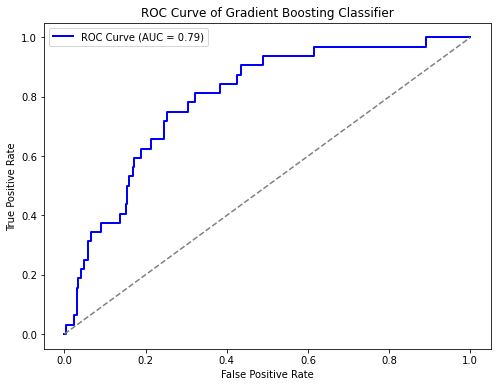

AUC of Gradient Boosting Classifier: 0.7931985294117647
Loss of Gradient Boosting Classifier: 0.21220430397639523


In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc, log_loss
import matplotlib.pyplot as plt

# Calculate the predicted probabilities
y_pred_prob_gb = best_model_gb.predict_proba(X_test_scaled)[:, 1]

# Compute the ROC Curve
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_prob_gb)

# Calculate the AUC
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Compute the loss
loss_gb = log_loss(y_test, y_pred_prob_gb)

# Visualize the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Gradient Boosting Classifier')
plt.legend()
plt.show()

# Output the AUC and Loss
print("AUC of Gradient Boosting Classifier:", roc_auc_gb)
print("Loss of Gradient Boosting Classifier:", loss_gb)

Histogram Gradient Boosting

In [47]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Create the Histogram Gradient Boosting model
hist_gradient_boosting = HistGradientBoostingClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'max_iter': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_leaf_nodes': [15, 31]
}

# Initialize the grid search
grid_search_hgb = GridSearchCV(hist_gradient_boosting, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Train the model and search for the best hyperparameters using grid search
grid_search_hgb.fit(X_train_scaled, y_train)

# Output the best hyperparameters
print("Best parameters found: ", grid_search_hgb.best_params_)
print("Best cross-validation accuracy: ", grid_search_hgb.best_score_)

# Use the best model to make predictions
best_model_hgb = grid_search_hgb.best_estimator_

# Perform cross-validation for performance evaluation
cv_results = cross_validate(best_model_hgb, X_train_scaled, y_train, cv=5, scoring=scoring)

# Evaluate performance
avg_accuracy_hgb = cv_results['test_accuracy'].mean()
avg_precision_hgb = cv_results['test_precision'].mean()
avg_recall_hgb = cv_results['test_recall'].mean()
avg_f1_hgb = cv_results['test_f1'].mean()

# Output the cross-validation results
print("\nHGB Performance (Best Model, Cross-Validation):")
print("Average Accuracy:", avg_accuracy_hgb)
print("Average Precision:", avg_precision_hgb)
print("Average Recall:", avg_recall_hgb)
print("Average F1 Score:",avg_f1_hgb)

  File "C:\Users\user\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\user\anaconda3\lib\subprocess.py", line 489, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\user\anaconda3\lib\subprocess.py", line 854, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\user\anaconda3\lib\subprocess.py", line 1307, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


Best parameters found:  {'learning_rate': 0.1, 'max_iter': 200, 'max_leaf_nodes': 31}
Best cross-validation accuracy:  0.9832059235602543

HGB Performance (Best Model, Cross-Validation):
Average Accuracy: 0.9832059235602543
Average Precision: 0.9837908145396644
Average Recall: 0.9832057609640795
Average F1 Score: 0.98320007861601


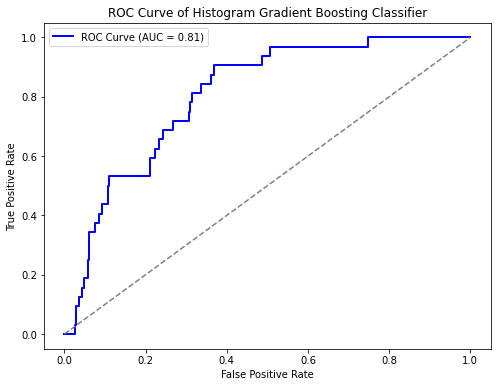

AUC of Histogram Gradient Boosting Classifier: 0.805891106442577
Loss of Histogram Gradient Boosting Classifier: 0.2574332960789341


In [48]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import roc_curve, auc, log_loss
import matplotlib.pyplot as plt

# Calculate the predicted probabilities
y_pred_prob_hgb = best_model_hgb.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC Curve
fpr_hgb, tpr_hgb, thresholds_hgb = roc_curve(y_test, y_pred_prob_hgb)

# Calculate AUC
roc_auc_hgb = auc(fpr_hgb, tpr_hgb)

# Calculate Loss
loss_hgb = log_loss(y_test, y_pred_prob_hgb)

# Visualize the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_hgb, tpr_hgb, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_hgb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Histogram Gradient Boosting Classifier')
plt.legend()
plt.show()

# Output AUC and Loss
print("AUC of Histogram Gradient Boosting Classifier:", roc_auc_hgb)
print("Loss of Histogram Gradient Boosting Classifier:", loss_hgb)

Bagging

In [49]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create the Bagging model
bagging = BaggingClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

# Initialize the grid search
grid_search_bag = GridSearchCV(bagging, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Train the model and search for the best hyperparameters using grid search
grid_search_bag.fit(X_train_scaled, y_train)

# Output the best hyperparameters
print("Best parameters found: ", grid_search_bag.best_params_)
print("Best cross-validation accuracy: ", grid_search_bag.best_score_)

# Use the best model to make predictions
best_model_bag = grid_search_bag.best_estimator_

# Perform cross-validation for performance evaluation
cv_results = cross_validate(best_model_bag, X_train_scaled, y_train, cv=5, scoring=scoring)

# Evaluate performance
avg_accuracy_bag = cv_results['test_accuracy'].mean()
avg_precision_bag = cv_results['test_precision'].mean()
avg_recall_bag = cv_results['test_recall'].mean()
avg_f1_bag = cv_results['test_f1'].mean()

# Output the cross-validation results
print("\nBAGGING Performance (Best Model, Cross-Validation):")
print("Average Accuracy:", avg_accuracy_bag)
print("Average Precision:", avg_precision_bag)
print("Average Recall:", avg_recall_bag)
print("Average F1 Score:", avg_f1_bag)

Best parameters found:  {'bootstrap': False, 'bootstrap_features': True, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 50}
Best cross-validation accuracy:  0.994576901663516

BAGGING Performance (Best Model, Cross-Validation):
Average Accuracy: 0.994576901663516
Average Precision: 0.9946410807433346
Average Recall: 0.994576439322499
Average F1 Score: 0.9945766778922076


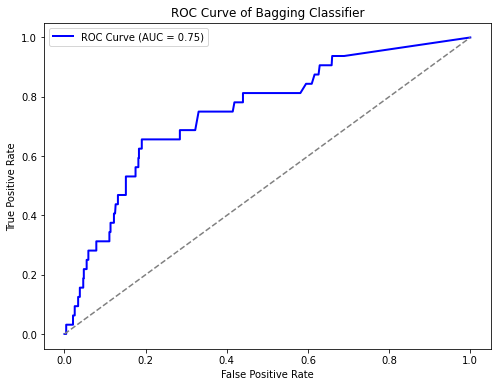

AUC of Bagging Classifier: 0.7495623249299719
Loss of Bagging Classifier: 0.25011890324646974


In [50]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_curve, auc, log_loss
import matplotlib.pyplot as plt

# Calculate the predicted probabilities
y_pred_prob_bagging = best_model_bag.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC Curve
fpr_bagging, tpr_bagging, thresholds_bagging = roc_curve(y_test, y_pred_prob_bagging)

# Calculate AUC
roc_auc_bag = auc(fpr_bagging, tpr_bagging)

# Calculate Loss
loss_bag = log_loss(y_test, y_pred_prob_bagging)

# Visualize ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_bagging, tpr_bagging, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_bag:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Bagging Classifier')
plt.legend()
plt.show()

# Output AUC and Loss
print("AUC of Bagging Classifier:", roc_auc_bag)
print("Loss of Bagging Classifier:", loss_bag)

Extra Trees

In [51]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

# Create the Extra Trees model
extra_trees = ExtraTreesClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the grid search
grid_search_et = GridSearchCV(extra_trees, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Train the model and search for the best hyperparameters using grid search
grid_search_et.fit(X_train_scaled, y_train)

# Output the best hyperparameters
print("Best parameters found: ", grid_search_et.best_params_)
print("Best cross-validation accuracy: ", grid_search_et.best_score_)

# Use the best model to make predictions
best_model_et = grid_search_et.best_estimator_

# Perform cross-validation for performance evaluation
cv_results = cross_validate(best_model_et, X_train_scaled, y_train, cv=5, scoring=scoring)

# Evaluate performance
avg_accuracy_et = cv_results['test_accuracy'].mean()
avg_precision_et = cv_results['test_precision'].mean()
avg_recall_et = cv_results['test_recall'].mean()
avg_f1_et = cv_results['test_f1'].mean()

# Output the cross-validation results
print("\nET Performance (Best Model, Cross-Validation):")
print("Average Accuracy:", avg_accuracy_et)
print("Average Precision:", avg_precision_et)
print("Average Recall:", avg_recall_et)
print("Average F1 Score:",avg_f1_et)


Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy:  0.9942272513138655

ET Performance (Best Model, Cross-Validation):
Average Accuracy: 0.9942272513138655
Average Precision: 0.9943054217092484
Average Recall: 0.9942264827991624
Average F1 Score: 0.9942269267149129


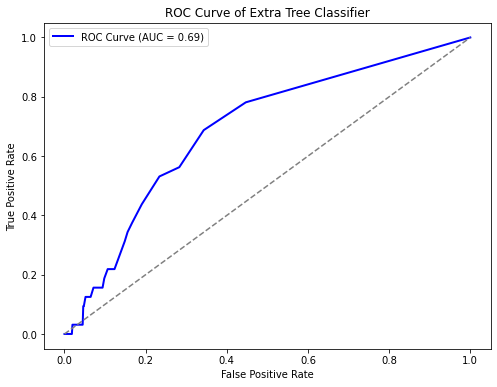

AUC of Extra Tree Classifier: 0.6906512605042018
Loss of Extra Tree Classifier: 0.48099702004084766


In [52]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc, log_loss
import matplotlib.pyplot as plt

# Calculate the predicted probabilities
y_pred_prob_extra_tree = best_model_et.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC Curve
fpr_extra_tree, tpr_extra_tree, thresholds_extra_tree = roc_curve(y_test, y_pred_prob_extra_tree)

# Calculate AUC
roc_auc_et = auc(fpr_extra_tree, tpr_extra_tree)

# Calculate Loss
loss_et = log_loss(y_test, y_pred_prob_extra_tree)

# Visualize the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_extra_tree, tpr_extra_tree, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_et:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Extra Tree Classifier')
plt.legend()
plt.show()

# Output AUC and Loss
print("AUC of Extra Tree Classifier:", roc_auc_et)
print("Loss of Extra Tree Classifier:", loss_et)

Stacking 

In [53]:
# Importing necessary libraries
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Defining base classifiers
base_classifiers = [
    ('decision_tree', DecisionTreeClassifier()),
    ('k_neighbors', KNeighborsClassifier()),
    ('svm', SVC())  
]

# Creating a Stacking model
stacking = StackingClassifier(estimators=base_classifiers, final_estimator=LogisticRegression(), cv=5)

# Setting up the grid of hyperparameters to search
param_grid = {
    'final_estimator__C': [0.1, 1, 10],
    'final_estimator__penalty': ['l1', 'l2']
}

# Initializing the grid search
grid_search_stacking = GridSearchCV(stacking, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Training the model and searching for the optimal hyperparameters using grid search
grid_search_stacking.fit(X_train_scaled, y_train)

# Printing the optimal hyperparameters
print("Best parameters found: ", grid_search_stacking.best_params_)
print("Best cross-validation accuracy: ", grid_search_stacking.best_score_)

# Performing predictions using the best model
best_model_stacking = grid_search_stacking.best_estimator_

# Evaluating performance using cross-validation
cv_results = cross_validate(best_model_stacking, X_train_scaled, y_train, cv=5, scoring=scoring)

# Performance evaluation
avg_accuracy_stacking = cv_results['test_accuracy'].mean()
avg_precision_stacking = cv_results['test_precision'].mean()
avg_recall_stacking = cv_results['test_recall'].mean()
avg_f1_stacking = cv_results['test_f1'].mean()

# Printing cross-validation results
print("\nStacking Performance (Optimal Model, Cross-validation):")
print("Average Accuracy:", avg_accuracy_stacking)
print("Average Precision:", avg_precision_stacking)
print("Average Recall:", avg_recall_stacking)
print("Average F1 Score:",avg_f1_stacking)


Best parameters found:  {'final_estimator__C': 10, 'final_estimator__penalty': 'l2'}
Best cross-validation accuracy:  0.9907281476179113

Stacking Performance (Optimal Model, Cross-validation):
Average Accuracy: 0.9900279292011576
Average Precision: 0.9902465462706143
Average Recall: 0.9900276168664961
Average F1 Score: 0.9900265135605155


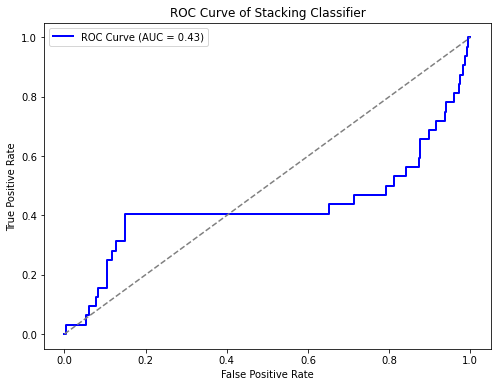

AUC of Stacking Classifier: 0.4290091036414565
Loss of Stacking Classifier: 0.9166198684295954


In [54]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Predicting probabilities
y_pred_prob_stacking = best_model_stacking.predict_proba(X_test_scaled)[:, 1]

# Calculating the ROC Curve
fpr_stacking, tpr_stacking, thresholds_stacking = roc_curve(y_test, y_pred_prob_stacking)

# Calculating the AUC
roc_auc_stacking = auc(fpr_stacking, tpr_stacking)

# Calculating the Loss
loss_stacking = log_loss(y_test, y_pred_prob_stacking)

# Visualizing the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_stacking, tpr_stacking, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_stacking:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Stacking Classifier')
plt.legend()
plt.show()

# Printing AUC and Loss
print("AUC of Stacking Classifier:", roc_auc_stacking)
print("Loss of Stacking Classifier:", loss_stacking)


Voting 

In [55]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Base classifiers
base_classifiers = [
    ('logistic_regression', LogisticRegression()),
    ('decision_tree', DecisionTreeClassifier()),
    ('k_neighbors', KNeighborsClassifier())
]

# Creating a Voting model
voting = VotingClassifier(estimators=base_classifiers, voting='soft')

# Setting up the grid of hyperparameters to search
param_grid = {
    'logistic_regression__C': [0.1, 1, 10],
    'decision_tree__max_depth': [None, 10, 20],
    'k_neighbors__n_neighbors': [3, 5, 7]
}

# Initializing GridSearchCV
grid_search_voting = GridSearchCV(voting, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Training the model and searching for the optimal hyperparameters using grid search
grid_search_voting.fit(X_train_scaled, y_train)

# Printing the optimal hyperparameters
print("Best parameters found: ", grid_search_voting.best_params_)
print("Best cross-validation accuracy: ", grid_search_voting.best_score_)

# Performing predictions using the best model
best_model_voting = grid_search_voting.best_estimator_

# Evaluating performance using cross-validation
cv_results = cross_validate(best_model_voting, X_train_scaled, y_train, cv=5, scoring=scoring)

# Performance evaluation
avg_accuracy_voting = cv_results['test_accuracy'].mean()
avg_precision_voting = cv_results['test_precision'].mean()
avg_recall_voting = cv_results['test_recall'].mean()
avg_f1_voting = cv_results['test_f1'].mean()

# Printing cross-validation results
print("\nVoting Performance (Optimal Model, Cross-validation):")
print("Average Accuracy:", avg_accuracy_voting)
print("Average Precision:", avg_precision_voting)
print("Average Recall:", avg_recall_voting)
print("Average F1 Score:",avg_f1_voting)


Best parameters found:  {'decision_tree__max_depth': 20, 'k_neighbors__n_neighbors': 3, 'logistic_regression__C': 1}
Best cross-validation accuracy:  0.9671100771494473

Voting Performance (Optimal Model, Cross-validation):
Average Accuracy: 0.9665856016249718
Average Precision: 0.9686960446107348
Average Recall: 0.9665842038871812
Average F1 Score: 0.9665470421003454


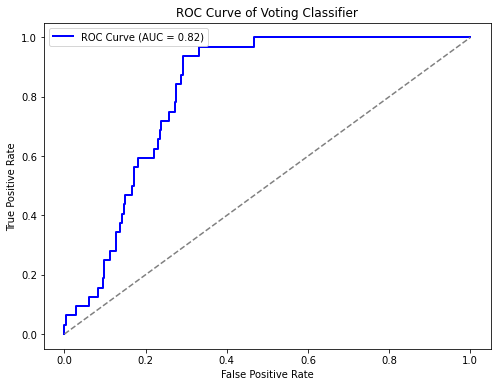

AUC of Voting Classifier: 0.819765406162465
Loss of Voting Classifier: 0.23098053127802742


In [56]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Predicting probabilities
y_pred_prob_voting = best_model_voting.predict_proba(X_test_scaled)[:, 1]

# Calculating the ROC Curve
fpr_voting, tpr_voting, thresholds_voting = roc_curve(y_test, y_pred_prob_voting)

# Calculating the AUC
roc_auc_voting = auc(fpr_voting, tpr_voting)

# Calculating the Loss
loss_voting = log_loss(y_test, y_pred_prob_voting)


# Visualizing the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_voting, tpr_voting, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_voting:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Voting Classifier')
plt.legend()
plt.show()

# Printing AUC and Loss
print("AUC of Voting Classifier:", roc_auc_voting)
print("Loss of Voting Classifier:", loss_voting)

CNN

In [57]:
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import numpy as np

# Define a function to create and compile the CNN model
def create_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the Keras model with KerasClassifier
keras_model = KerasClassifier(build_fn=create_cnn_model, epochs=50, batch_size=32, verbose=1)

# Define custom scorers
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary')
}

# Perform cross-validation
cv_results = cross_validate(keras_model, X_train_scaled, y_train, cv=5, scoring=scoring)

# Performance evaluation
avg_accuracy_cnn = cv_results['test_accuracy'].mean()
avg_precision_cnn = cv_results['test_precision'].mean()
avg_recall_cnn = cv_results['test_recall'].mean()
avg_f1_cnn = cv_results['test_f1'].mean()

# Print cross-validation results
print("\nCNN Model Performance (Cross-validation):")
print("Average Accuracy:", avg_accuracy_cnn)
print("Average Precision:", avg_precision_cnn)
print("Average Recall:", avg_recall_cnn)
print("Average F1 Score:", avg_f1_cnn)


Epoch 1/50
143/143 [==============================] - 3s 6ms/step - loss: 0.5565 - accuracy: 0.7367
Epoch 2/50
143/143 [==============================] - 1s 6ms/step - loss: 0.5103 - accuracy: 0.7671
Epoch 3/50
143/143 [==============================] - 1s 5ms/step - loss: 0.5063 - accuracy: 0.7736
Epoch 4/50
143/143 [==============================] - 1s 6ms/step - loss: 0.4961 - accuracy: 0.7747
Epoch 5/50
143/143 [==============================] - 1s 4ms/step - loss: 0.4919 - accuracy: 0.7789
Epoch 6/50
143/143 [==============================] - 0s 3ms/step - loss: 0.4884 - accuracy: 0.7782
Epoch 7/50
143/143 [==============================] - 0s 3ms/step - loss: 0.4834 - accuracy: 0.7852
Epoch 8/50
143/143 [==============================] - 0s 3ms/step - loss: 0.4823 - accuracy: 0.7806
Epoch 9/50
143/143 [==============================] - 0s 3ms/step - loss: 0.4782 - accuracy: 0.7800
Epoch 10/50
143/143 [==============================] - 0s 3ms/step - loss: 0.4748 - accuracy: 0.7863

143/143 [==============================] - 1s 6ms/step - loss: 0.4769 - accuracy: 0.7606
Epoch 12/50
143/143 [==============================] - 1s 7ms/step - loss: 0.4758 - accuracy: 0.7721
Epoch 13/50
143/143 [==============================] - 1s 7ms/step - loss: 0.4670 - accuracy: 0.7691
Epoch 14/50
143/143 [==============================] - 1s 6ms/step - loss: 0.4630 - accuracy: 0.7724
Epoch 15/50
143/143 [==============================] - 1s 7ms/step - loss: 0.4642 - accuracy: 0.7695
Epoch 16/50
143/143 [==============================] - 1s 7ms/step - loss: 0.4596 - accuracy: 0.7717
Epoch 17/50
143/143 [==============================] - 1s 7ms/step - loss: 0.4609 - accuracy: 0.7702
Epoch 18/50
143/143 [==============================] - 1s 7ms/step - loss: 0.4534 - accuracy: 0.7713
Epoch 19/50
143/143 [==============================] - 1s 6ms/step - loss: 0.4501 - accuracy: 0.7756
Epoch 20/50
143/143 [==============================] - 1s 6ms/step - loss: 0.4498 - accuracy: 0.7787
Ep

Epoch 1/50
19/19 [==============================] - 2s 4ms/step - loss: 0.5946 - accuracy: 0.7534
Epoch 2/50
19/19 [==============================] - 0s 4ms/step - loss: 0.3517 - accuracy: 0.9631
Epoch 3/50
19/19 [==============================] - 0s 4ms/step - loss: 0.2368 - accuracy: 0.9631
Epoch 4/50
19/19 [==============================] - 0s 3ms/step - loss: 0.1971 - accuracy: 0.9631
Epoch 5/50
19/19 [==============================] - 0s 4ms/step - loss: 0.1593 - accuracy: 0.9631
Epoch 6/50
19/19 [==============================] - 0s 4ms/step - loss: 0.1500 - accuracy: 0.9631
Epoch 7/50
19/19 [==============================] - 0s 4ms/step - loss: 0.1543 - accuracy: 0.9631
Epoch 8/50
19/19 [==============================] - 0s 4ms/step - loss: 0.1503 - accuracy: 0.9631
Epoch 9/50
19/19 [==============================] - 0s 5ms/step - loss: 0.1505 - accuracy: 0.9631
Epoch 10/50
19/19 [==============================] - 0s 4ms/step - loss: 0.1489 - accuracy: 0.9631
Epoch 11/50
19/19 [

19/19 [==============================] - 0s 3ms/step - loss: 0.1746 - accuracy: 0.9564
Epoch 16/50
19/19 [==============================] - 0s 3ms/step - loss: 0.1588 - accuracy: 0.9548
Epoch 17/50
19/19 [==============================] - 0s 4ms/step - loss: 0.1590 - accuracy: 0.9564
Epoch 18/50
19/19 [==============================] - 0s 3ms/step - loss: 0.1528 - accuracy: 0.9564
Epoch 19/50
19/19 [==============================] - 0s 3ms/step - loss: 0.1540 - accuracy: 0.9564
Epoch 20/50
19/19 [==============================] - 0s 4ms/step - loss: 0.1575 - accuracy: 0.9564
Epoch 21/50
19/19 [==============================] - 0s 3ms/step - loss: 0.1611 - accuracy: 0.9564
Epoch 22/50
19/19 [==============================] - 0s 4ms/step - loss: 0.1469 - accuracy: 0.9564
Epoch 23/50
19/19 [==============================] - 0s 3ms/step - loss: 0.1480 - accuracy: 0.9564
Epoch 24/50
19/19 [==============================] - 0s 3ms/step - loss: 0.1643 - accuracy: 0.9564
Epoch 25/50
19/19 [===

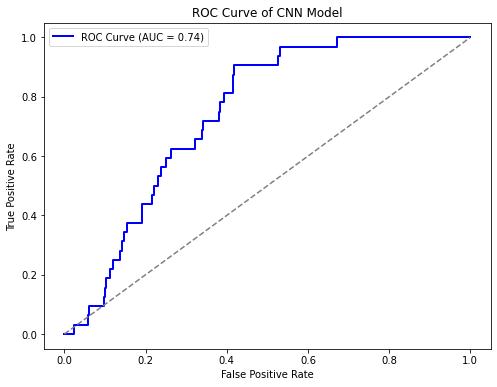

AUC of CNN Model: 0.7440476190476191
Loss of CNN Model: 0.16600372388147003


In [58]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc
# Perform cross-validation predictions
y_pred_prob_cnn = cross_val_predict(keras_model, X_test_scaled, y_test, cv=5, method='predict_proba')[:, 1]

# Calculate ROC Curve
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(y_test, y_pred_prob_cnn)

# Calculate AUC
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

# Calculating the Loss
loss_cnn = log_loss(y_test, y_pred_prob_cnn)

# Visualize ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_cnn, tpr_cnn, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_cnn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of CNN Model')
plt.legend()
plt.show()

# Print AUC and Loss
print("AUC of CNN Model:", roc_auc_cnn)
print("Loss of CNN Model:", loss_cnn)

In [59]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

# Define a function to create and compile the CNN model
def create_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the Keras model with KerasClassifier
keras_model = KerasClassifier(build_fn=create_cnn_model, epochs=50, batch_size=32, verbose=1)

# Train the CNN model to extract features
keras_model.fit(X_train_scaled, y_train)

# Extract features using the trained CNN model
feature_extractor = Model(inputs=keras_model.model.inputs, outputs=keras_model.model.layers[-2].output)
features_train = feature_extractor.predict(X_train_scaled)

# Define Logistic Regression model
lr_model = LogisticRegression()

# Perform cross-validation on Logistic Regression model with extracted features
cv_results = cross_validate(lr_model, features_train, y_train, cv=5, scoring=scoring)

# Performance evaluation
avg_accuracy_hybrid = cv_results['test_accuracy'].mean()
avg_precision_hybrid = cv_results['test_precision'].mean()
avg_recall_hybrid = cv_results['test_recall'].mean()
avg_f1_hybrid = cv_results['test_f1'].mean()

# Print cross-validation results
print("\nHybrid CNN + Logistic Regression Model Performance (Cross-validation):")
print("Average Accuracy:", avg_accuracy_hybrid)
print("Average Precision:", avg_precision_hybrid)
print("Average Recall:", avg_recall_hybrid)
print("Average F1 Score:", avg_f1_hybrid)


Epoch 1/50
179/179 [==============================] - 2s 4ms/step - loss: 0.5637 - accuracy: 0.7218
Epoch 2/50
179/179 [==============================] - 1s 6ms/step - loss: 0.5298 - accuracy: 0.7428
Epoch 3/50
179/179 [==============================] - 1s 7ms/step - loss: 0.5227 - accuracy: 0.7476
Epoch 4/50
179/179 [==============================] - 1s 6ms/step - loss: 0.5181 - accuracy: 0.7472
Epoch 5/50
179/179 [==============================] - 1s 3ms/step - loss: 0.5116 - accuracy: 0.7490
Epoch 6/50
179/179 [==============================] - 0s 3ms/step - loss: 0.5011 - accuracy: 0.7509
Epoch 7/50
179/179 [==============================] - 1s 3ms/step - loss: 0.4991 - accuracy: 0.7540
Epoch 8/50
179/179 [==============================] - 1s 4ms/step - loss: 0.4983 - accuracy: 0.7573
Epoch 9/50
179/179 [==============================] - 1s 4ms/step - loss: 0.4919 - accuracy: 0.7614
Epoch 10/50
179/179 [==============================] - 1s 4ms/step - loss: 0.4873 - accuracy: 0.7631

Epoch 1/50
24/24 [==============================] - 2s 4ms/step - loss: 0.5036 - accuracy: 0.8311
Epoch 2/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2361 - accuracy: 0.9571
Epoch 3/50
24/24 [==============================] - 0s 3ms/step - loss: 0.1785 - accuracy: 0.9571
Epoch 4/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1642 - accuracy: 0.9571
Epoch 5/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1686 - accuracy: 0.9571
Epoch 6/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1683 - accuracy: 0.9571
Epoch 7/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1691 - accuracy: 0.9571
Epoch 8/50
24/24 [==============================] - 0s 6ms/step - loss: 0.1643 - accuracy: 0.9571
Epoch 9/50
24/24 [==============================] - 0s 8ms/step - loss: 0.1594 - accuracy: 0.9571
Epoch 10/50
24/24 [==============================] - 0s 8ms/step - loss: 0.1596 - accuracy: 0.9571
Epoch 11/50
24/24 [

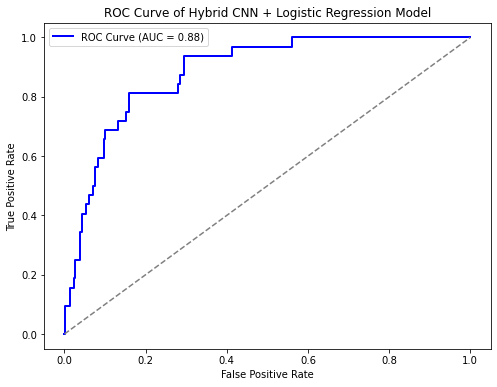

AUC of Hybrid Model: 0.8827468487394958
Loss of Hybrid Model: 0.13248537706154515


In [60]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train the CNN model
cnn_model = create_cnn_model()
cnn_model.fit(X_test_scaled, y_test, epochs=50, batch_size=32, verbose=1)

# Extract features using the trained CNN model
feature_extractor = Model(inputs=cnn_model.inputs, outputs=cnn_model.layers[-2].output)
features_test = feature_extractor.predict(X_test_scaled)

# Define Logistic Regression model
lr_model = LogisticRegression()

# Train Logistic Regression model on extracted features
lr_model.fit(features_test, y_test)

# Predict probabilities using the Logistic Regression model
y_pred_prob_hybrid = lr_model.predict_proba(features_test)[:, 1]

# Calculate ROC Curve
fpr_hybrid, tpr_hybrid, thresholds_hybrid = roc_curve(y_test, y_pred_prob_hybrid)

# Calculate AUC
roc_auc_hybrid = auc(fpr_hybrid, tpr_hybrid)

# Calculating the Loss
loss_hybrid = log_loss(y_test, y_pred_prob_hybrid)

# Visualize ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_hybrid, tpr_hybrid, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_hybrid:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Hybrid CNN + Logistic Regression Model')
plt.legend()
plt.show()

# Print AUC
print("AUC of Hybrid Model:", roc_auc_hybrid)
print("Loss of Hybrid Model:", loss_hybrid)

## 8. Determination of the Optimal Model

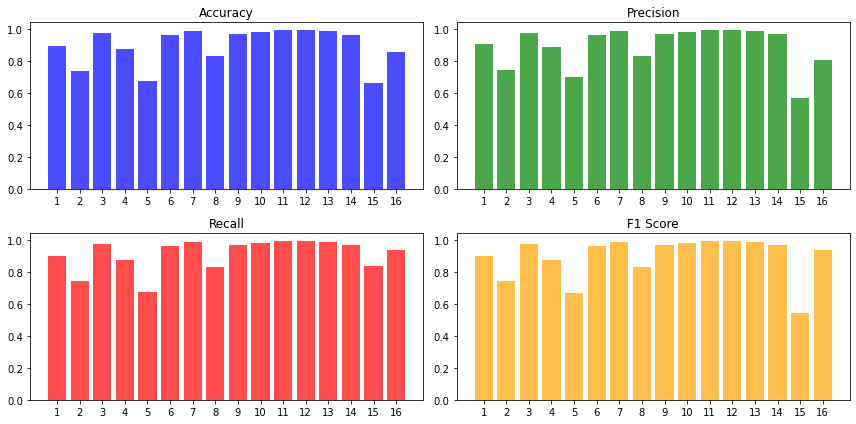

In [62]:
accuracy_scores = [avg_accuracy_mlp, avg_accuracy_lr, avg_accuracy_dt, avg_accuracy_svc, avg_accuracy_nb,
                   avg_accuracy_knn, avg_accuracy_rf, avg_accuracy_ab, avg_accuracy_gb,
                   avg_accuracy_hgb, avg_accuracy_bag, avg_accuracy_et, avg_accuracy_stacking,
                   avg_accuracy_voting, avg_accuracy_cnn, avg_accuracy_hybrid]
precision_scores = [avg_precision_mlp, avg_precision_lr, avg_precision_dt, avg_precision_svc, avg_precision_nb,
                    avg_precision_knn, avg_precision_rf, avg_precision_ab, avg_precision_gb,
                    avg_precision_hgb, avg_precision_bag, avg_precision_et, avg_precision_stacking,
                    avg_precision_voting, avg_precision_cnn, avg_precision_hybrid]
recall_scores = [avg_recall_mlp, avg_recall_lr, avg_recall_dt, avg_recall_svc, avg_recall_nb,
                 avg_recall_knn, avg_recall_rf, avg_recall_ab, avg_recall_gb,
                 avg_recall_hgb, avg_recall_bag, avg_recall_et, avg_recall_stacking,
                 avg_recall_voting, avg_recall_cnn, avg_recall_hybrid]
f1_scores = [avg_f1_mlp, avg_f1_lr, avg_f1_dt, avg_f1_svc, avg_f1_nb,
             avg_f1_knn, avg_f1_rf, avg_f1_ab, avg_f1_gb,
             avg_f1_hgb, avg_f1_bag, avg_f1_et, avg_f1_stacking,
             avg_f1_voting, avg_f1_cnn, avg_recall_hybrid]

# Creating bar graphs for each evaluation metric
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.bar(range(1, 17), accuracy_scores, color='b', alpha=0.7)
plt.title('Accuracy')
plt.xticks(range(1, 17), range(1, 17))

plt.subplot(2, 2, 2)
plt.bar(range(1, 17), precision_scores, color='g', alpha=0.7)
plt.title('Precision')
plt.xticks(range(1, 17), range(1, 17))

plt.subplot(2, 2, 3)
plt.bar(range(1, 17), recall_scores, color='r', alpha=0.7)
plt.title('Recall')
plt.xticks(range(1, 17), range(1, 17))

plt.subplot(2, 2, 4)
plt.bar(range(1, 17), f1_scores, color='orange', alpha=0.7)
plt.title('F1 Score')
plt.xticks(range(1, 17), range(1, 17))

plt.tight_layout()
plt.show()

#### Visualizing the loss for each model

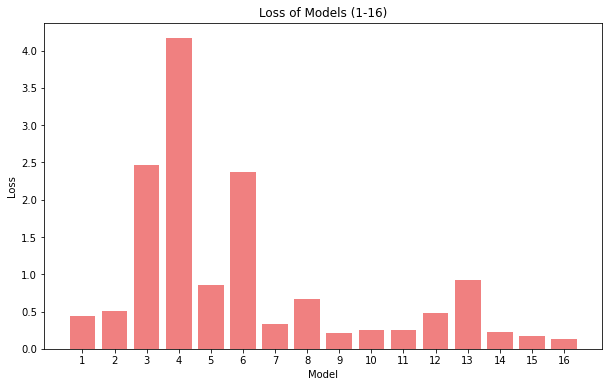

In [64]:
model_loss = [loss_mlp, loss_lr, loss_dt, loss_svc, loss_nb,
             loss_knn, loss_rf, loss_ab, loss_gb,
             loss_hgb, loss_bag, loss_et, loss_stacking,
             loss_voting, loss_cnn, loss_hybrid]

plt.figure(figsize=(10, 6))
plt.bar(range(1, 17), model_loss, color='lightcoral')
plt.xlabel('Model')
plt.ylabel('Loss')
plt.title('Loss of Models (1-16)')
plt.xticks(range(1, 17), range(1, 17))
plt.show()


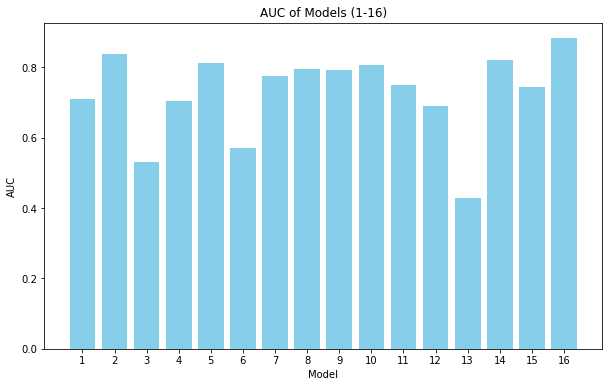

In [65]:
model_auc = [roc_auc_mlp, roc_auc_lr, roc_auc_dt, roc_auc_svc, roc_auc_nb,
             roc_auc_knn, roc_auc_rf, roc_auc_ab, roc_auc_gb,
             roc_auc_hgb, roc_auc_bag, roc_auc_et, roc_auc_stacking,
             roc_auc_voting, roc_auc_cnn, roc_auc_hybrid]
plt.figure(figsize=(10, 6))
plt.bar(range(1, 17), model_auc, color='skyblue')
plt.xlabel('Model')
plt.ylabel('AUC')
plt.title('AUC of Models (1-16)')
plt.xticks(range(1, 17), range(1, 17))
plt.show()

In [66]:
models = [
    "MLP", "Logistic Regression", "Decision Tree", "SVC", "Gaussian Naive Bayes",
    "K-Neighbor", "Random Forest", "AdaBoost", "Gradient Boosting", "Histogram Gradient Boosting",
    "Bagging", "Extra Tree", "Stacking", "Voting", "CNN", "Hybrid"]
# Normalizing each performance metric
normalized_accuracy = (accuracy_scores - np.min(accuracy_scores)) / (np.max(accuracy_scores) - np.min(accuracy_scores))
normalized_precision = (precision_scores - np.min(precision_scores)) / (np.max(precision_scores) - np.min(precision_scores))
normalized_recall = (recall_scores - np.min(recall_scores)) / (np.max(recall_scores) - np.min(recall_scores))
normalized_f1 = (f1_scores - np.min(f1_scores)) / (np.max(f1_scores) - np.min(f1_scores))
normalized_roc_auc = (model_auc - np.min(model_auc)) / (np.max(model_auc) - np.min(model_auc))

# Assigning weights to each metric
weights = {'Accuracy': 0.2, 'Precision': 0.1, 'Recall': 0.3, 'F1': 0.3, 'ROC AUC': 0.1}
weighted_scores = (weights['Accuracy'] * normalized_accuracy +
                   weights['Precision'] * normalized_precision +
                   weights['Recall'] * normalized_recall +
                   weights['F1'] * normalized_f1 +
                   weights['ROC AUC'] * normalized_roc_auc)

# Selecting the best model
best_model_index = np.argmax(weighted_scores)
best_model = models[best_model_index]

print(f"Best Model: {best_model}")

Best Model: Bagging


In [67]:
best_model =best_model_bag

Bagging model was selected as the optimal model because the performance of the bagging model was the best.


Then, compare the additional attribute selection method with ML and DL models

## 9. Evaluation of Optimal Model Performance on Test Set

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions on the test set using the best model
y_test_pred = best_model.predict(X_test_scaled)

# Performance evaluation on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')

# Printing the results
print("\nFinal Model Performance on Test Set:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 Score:", test_f1)


Final Model Performance on Test Set:
Accuracy: 0.9490616621983914
Precision: 0.5796195652173913
Recall: 0.5256477591036415
F1 Score: 0.5345155993431856


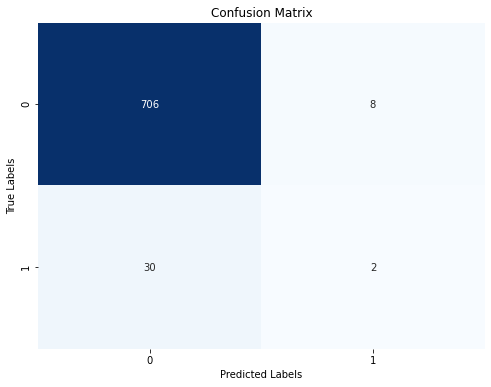

In [66]:
from sklearn.metrics import confusion_matrix, classification_report

# Creating Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

# Creating Classification Report
class_names = ["Class 0", "Class 1"]
cr = classification_report(y_test, y_test_pred, target_names=class_names)

# Visualization - Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


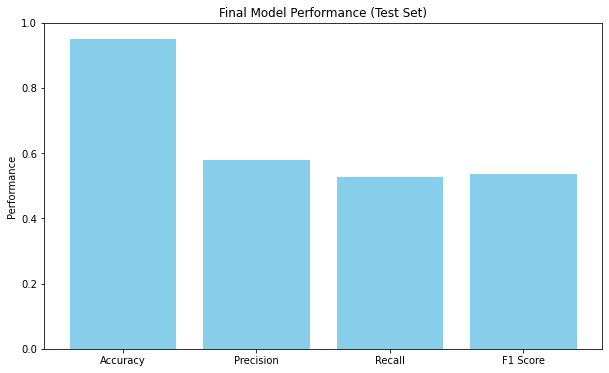

In [67]:
import matplotlib.pyplot as plt

# Metrics and their names stored in lists for visualization
test_metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
test_scores = [test_accuracy, test_precision, test_recall, test_f1]

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(test_metrics, test_scores, color='skyblue')
plt.ylabel('Performance')
plt.title('Final Model Performance (Test Set)')
plt.ylim(0.0, 1.0)
plt.show()


####  Although the accuracy has slightly decreased, other metrics have significantly improved. 
#### This model appears to be the optimal one.

## 10. Performance Comparison between the Final Model and Additional Feature Selection Model

In [68]:
pip install deap

Note: you may need to restart the kernel to use updated packages.


#### Create a dataset with standardization only(no feature selection)

In [69]:
# Creating data with standardization only, without feature selection
from sklearn.preprocessing import StandardScaler

# Creating a StandardScaler object for standardization
scaler = StandardScaler()

X_train_only_scaled = scaler.fit_transform(X_over)
X_test_only_scaled = scaler.transform(X_test)


**Genetic Algorithm**

In [70]:
import numpy as np
from sklearn.model_selection import cross_val_score
from deap import base, creator, tools, algorithms

# Define evaluation function for genetic algorithm
def evaluate(individual):
    selected_features = np.array(individual) == 1
    X_selected = X_train_only_scaled[:, selected_features]
    
    if X_selected.shape[1] == 0:
        return 0,
    
    bagging = BaggingClassifier(random_state=42)
    scores = cross_val_score(bagging, X_selected, y_train, cv=5, scoring='f1')
    return scores.mean(),

# Configure DEAP genetic algorithm
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", np.random.randint, 0, 2)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(X_train_only_scaled[0]))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

# Run the genetic algorithm
population = toolbox.population(n=50)
ngen = 20
cxpb = 0.5
mutpb = 0.2

algorithms.eaSimple(population, toolbox, cxpb, mutpb, ngen, stats=None, halloffame=None, verbose=True)

# Select the best individual
best_individual = tools.selBest(population, k=1)[0]
selected_features = np.array(best_individual) == 1

# Train and evaluate model with the best features
X_genetic = X_train_only_scaled[:, selected_features]
bagging = BaggingClassifier(random_state=42)

# Performance evaluation using cross-validation
cv_results = cross_validate(bagging, X_genetic, y_train, cv=5, scoring=scoring)

# Performance evaluation
avg_accuracy_gen = cv_results['test_accuracy'].mean()
avg_precision_gen = cv_results['test_precision'].mean()
avg_recall_gen = cv_results['test_recall'].mean()
avg_f1_gen = cv_results['test_f1'].mean()

# Print cross-validation results
print("\nGenetic Algorithm Performance:")
print("Average Accuracy:", avg_accuracy_gen)
print("Average Precision:", avg_precision_gen)
print("Average Recall:", avg_recall_gen)
print("Average F1 Score:",avg_f1_gen)


gen	nevals
0  	50    
1  	24    
2  	29    
3  	21    
4  	36    
5  	28    
6  	26    
7  	24    
8  	19    
9  	29    
10 	35    
11 	37    
12 	34    
13 	28    
14 	35    
15 	35    
16 	37    
17 	27    
18 	32    
19 	29    
20 	26    

Genetic Algorithm Performance:
Average Accuracy: 0.9893281696431302
Average Precision: 0.979118099584743
Average Recall: 1.0
Average F1 Score: 0.9894452727412899


**RFE**

In [71]:
from sklearn.feature_selection import RFE

bagging = BaggingClassifier(random_state=42)

# Feature selection using RFE
rfe = RFE(estimator= bagging, n_features_to_select=10)
X_rfe = rfe.fit_transform(X_train_only_scaled, y_train)

# Performance evaluation using cross-validation
cv_results = cross_validate( bagging, X_rfe, y_train, cv=5, scoring=scoring)

# Performance evaluation
avg_accuracy_rfe = cv_results['test_accuracy'].mean()
avg_precision_rfe = cv_results['test_precision'].mean()
avg_recall_rfe = cv_results['test_recall'].mean()
avg_f1_rfe = cv_results['test_f1'].mean()

# Print cross-validation results
print("\nRFE Performance:")
print("Average Accuracy:", avg_accuracy_rfe)
print("Average Precision:", avg_precision_rfe)
print("Average Recall:", avg_recall_rfe)
print("Average F1 Score:",avg_f1_rfe)



RFE Performance:
Average Accuracy: 0.9882793715470882
Average Precision: 0.9771401633206593
Average Recall: 1.0
Average F1 Score: 0.9884268197610078


**Random Forest Important**

In [72]:
from sklearn.ensemble import RandomForestClassifier

# Calculate feature importance using Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_only_scaled, y_train)

# Extract feature importances
importances = rf.feature_importances_

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Select top n features (e.g., top 10 features)
n_features = 10
selected_indices = indices[:n_features]
X_randomforest = X_train_only_scaled[:, selected_indices]


bagging = BaggingClassifier(random_state=42)

# Performance evaluation using cross-validation
cv_results = cross_validate( bagging, X_randomforest, y_train, cv=5, scoring=scoring)

# Performance evaluation
avg_accuracy_rf = cv_results['test_accuracy'].mean()
avg_precision_rf = cv_results['test_precision'].mean()
avg_recall_rf = cv_results['test_recall'].mean()
avg_f1_rf = cv_results['test_f1'].mean()

# Print cross-validation results
print("\nRandom Forest Importance Performance:")
print("Average Accuracy:", avg_accuracy_rf)
print("Average Precision:", avg_precision_rf)
print("Average Recall:", avg_recall_rf)
print("Average F1 Score:",avg_f1_rf)



Random Forest Importance Performance:
Average Accuracy: 0.9870548305587675
Average Precision: 0.9748243519597597
Average Recall: 1.0
Average F1 Score: 0.9872363981578014


**Variance Threshold**

In [73]:
from sklearn.feature_selection import VarianceThreshold

# Feature selection using Variance Threshold
threshold = 0.1  # Set variance threshold (e.g., 0.1, adjust according to the dataset)
selector = VarianceThreshold(threshold=threshold)
X_variance = selector.fit_transform(X_train_only_scaled)

bagging = BaggingClassifier(random_state=42)

# Performance evaluation using cross-validation
cv_results = cross_validate( bagging, X_variance, y_train, cv=5, scoring=scoring)

# Performance evaluation
avg_accuracy_vt = cv_results['test_accuracy'].mean()
avg_precision_vt = cv_results['test_precision'].mean()
avg_recall_vt = cv_results['test_recall'].mean()
avg_f1_vt = cv_results['test_f1'].mean()

# Print cross-validation results
print("\nVariance Threshold Performance:")
print("Average Accuracy:", avg_accuracy_vt)
print("Average Precision:", avg_precision_vt)
print("Average Recall:", avg_recall_vt)
print("Average F1 Score:",avg_f1_vt)



Variance Threshold Performance:
Average Accuracy: 0.9882793715470882
Average Precision: 0.9771401633206593
Average Recall: 1.0
Average F1 Score: 0.9884268197610078


**PCA**

In [74]:
from sklearn.decomposition import PCA
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores= []

bagging = BaggingClassifier(random_state=42)

for i in range(1,6):
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train_only_scaled)
    
    cv_results = cross_validate(bagging, X_train_pca, y_train, cv=5, scoring=scoring)

    # 각 지표의 평균값을 저장
    accuracy_scores.append(cv_results['test_accuracy'].mean())
    precision_scores.append(cv_results['test_precision'].mean())
    recall_scores.append(cv_results['test_recall'].mean())
    f1_scores.append(cv_results['test_f1'].mean())

avg_accuracy_pca = np.mean(accuracy_scores)
avg_precision_pca = np.mean(precision_scores)
avg_recall_pca = np.mean(recall_scores)
avg_f1_pca = np.mean(f1_scores)
    
print("\nPCA Performance:")    
print(f"Average Accuracy: {avg_accuracy_pca:f}")
print(f"Average Precision: {avg_precision_pca:f}")
print(f"Average Recall: {avg_recall_pca:f}")
print(f"Average F1 Score: {avg_f1_pca:f}")



PCA Performance:
Average Accuracy: 0.984325
Average Precision: 0.969827
Average Recall: 1.000000
Average F1 Score: 0.984626


**Select K Best**

In [75]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

# SelectKBest for feature selection
k = 5  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_selectkbest = selector.fit_transform(X_train_only_scaled, y_train)

bagging = BaggingClassifier(random_state=42)

# Performance evaluation using cross-validation
cv_results = cross_validate( bagging, X_selectkbest, y_train, cv=5, scoring=scoring)

# Performance evaluation
avg_accuracy_skb = cv_results['test_accuracy'].mean()
avg_precision_skb = cv_results['test_precision'].mean()
avg_recall_skb = cv_results['test_recall'].mean()
avg_f1_skb = cv_results['test_f1'].mean()

# Print cross-validation results
print("Select K-Best Performance:")
print("Average Accuracy:", avg_accuracy_skb)
print("Average Precision:", avg_precision_skb)
print("Average Recall:", avg_recall_skb)
print("Average F1 Score:",avg_f1_skb)


Select K-Best Performance:
Average Accuracy: 0.9777820604592258
Average Precision: 0.9574956750271033
Average Recall: 1.0
Average F1 Score: 0.9782769673401361


#### Comparison of Performance for Each Feature Selection Method

In [76]:
accuracy_scores_fc =  [avg_accuracy_bag,  avg_accuracy_gen,  avg_accuracy_rfe,  avg_accuracy_rf,  avg_accuracy_vt,   avg_accuracy_pca,  avg_accuracy_skb,]
precision_scores_fc = [avg_precision_bag, avg_precision_gen, avg_precision_rfe, avg_precision_rf, avg_precision_vt,  avg_precision_pca, avg_precision_skb]
recall_scores_fc =    [avg_recall_bag,    avg_recall_gen,    avg_recall_rfe,    avg_recall_rf,    avg_recall_vt,     avg_recall_pca,    avg_recall_skb, ]
f1_scores_fc =        [avg_f1_bag,        avg_f1_gen,        avg_f1_rfe,        avg_f1_rf,        avg_f1_vt,         avg_f1_pca,        avg_f1_skb,    ]
models = ['Final model' , 'Genetic' ,  'RFE' , 'Random Forest' ,' Variance Threshold','PCA','Select K-best']

#### Create a bar graph for each evaluation indicator

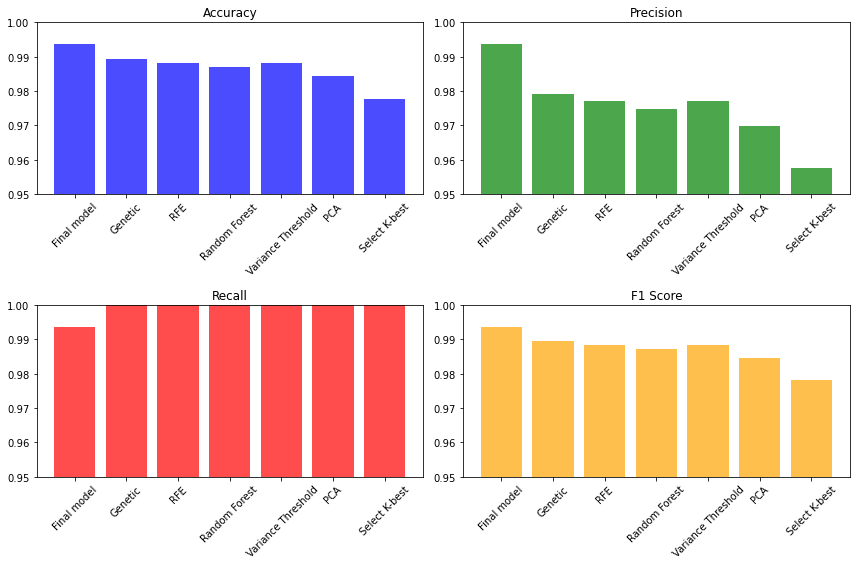

In [77]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.bar(range(0, 7), accuracy_scores_fc, color='b', alpha=0.7)
plt.title('Accuracy')
plt.xticks(range(len(models)), models, rotation=45)
plt.ylim(0.95, 1) 

plt.subplot(2, 2, 2)
plt.bar(range(0, 7), precision_scores_fc, color='g', alpha=0.7)
plt.title('Precision')
plt.xticks(range(len(models)), models, rotation=45)
plt.ylim(0.95, 1) 

plt.subplot(2, 2, 3)
plt.bar(range(0, 7), recall_scores_fc, color='r', alpha=0.7)
plt.title('Recall')
plt.xticks(range(len(models)), models, rotation=45)
plt.ylim(0.95, 1) 

plt.subplot(2, 2, 4)
plt.bar(range(0, 7), f1_scores_fc, color='orange', alpha=0.7)
plt.title('F1 Score')
plt.xticks(range(len(models)), models, rotation=45)
plt.ylim(0.95, 1)

plt.tight_layout()
plt.show()

#### Genetic Algorithm > Random Forest Important = RFE = Variance Threshold >PCA > Select K-best

#### Gegetic Algorithm and Select K-Best perform well enough to exceed the final model without grid search

## 11.Compare performance between final and unsupervised deep learning/machine learning models

GAN

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Define the generator model
def build_generator():
    generator = Sequential()
    generator.add(Dense(50, activation='relu', input_dim=100))
    generator.add(Dense(100, activation='relu'))
    generator.add(Dense(X_train_scaled.shape[1], activation='linear'))  # Output layer
    return generator

# Define the discriminator model
def build_discriminator():
    discriminator = Sequential()
    discriminator.add(Dense(50, activation='relu', input_dim=X_train_scaled.shape[1]))
    discriminator.add(Dropout(0.5))
    discriminator.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return discriminator

# Build the GAN model combining generator and discriminator
def build_gan(generator, discriminator):
    discriminator.trainable = False  # Freeze the discriminator during GAN training
    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(gan_input, gan_output)
    gan.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return gan

# Wrap the GAN model with KerasClassifier
gan_generator = build_generator()
gan_discriminator = build_discriminator()
gan_model = KerasClassifier(build_fn=lambda: build_gan(gan_generator, gan_discriminator), epochs=50, batch_size=32, verbose=1)

# Define custom scorers
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary')
}

# Perform cross-validation
cv_results = cross_validate(gan_model, np.random.rand(len(X_train_scaled), 100), y_train, cv=5, scoring=scoring)

# Performance evaluation
avg_accuracy_gan = cv_results['test_accuracy'].mean()
avg_precision_gan = cv_results['test_precision'].mean()
avg_recall_gan = cv_results['test_recall'].mean()
avg_f1_gan = cv_results['test_f1'].mean()

# Print cross-validation results
print("\nGAN Model Performance (Cross-validation):")
print("Average Accuracy:", avg_accuracy_gan)
print("Average Precision:", avg_precision_gan)
print("Average Recall:", avg_recall_gan)
print("Average F1 Score:", avg_f1_gan)

Epoch 1/50
143/143 [==============================] - 2s 4ms/step - loss: 0.6804 - accuracy: 0.5840
Epoch 2/50
143/143 [==============================] - 1s 6ms/step - loss: 0.6755 - accuracy: 0.6002
Epoch 3/50
143/143 [==============================] - 1s 7ms/step - loss: 0.6707 - accuracy: 0.6070
Epoch 4/50
143/143 [==============================] - 1s 7ms/step - loss: 0.6712 - accuracy: 0.6085
Epoch 5/50
143/143 [==============================] - 1s 5ms/step - loss: 0.6677 - accuracy: 0.6109
Epoch 6/50
143/143 [==============================] - 1s 7ms/step - loss: 0.6667 - accuracy: 0.6100
Epoch 7/50
143/143 [==============================] - 1s 8ms/step - loss: 0.6656 - accuracy: 0.6109
Epoch 8/50
143/143 [==============================] - 1s 7ms/step - loss: 0.6628 - accuracy: 0.6129
Epoch 9/50
143/143 [==============================] - 1s 7ms/step - loss: 0.6615 - accuracy: 0.6179
Epoch 10/50
143/143 [==============================] - 1s 8ms/step - loss: 0.6631 - accuracy: 0.6161

143/143 [==============================] - 1s 7ms/step - loss: 0.1658 - accuracy: 0.9436
Epoch 12/50
143/143 [==============================] - 1s 6ms/step - loss: 0.1646 - accuracy: 0.9407
Epoch 13/50
143/143 [==============================] - 1s 6ms/step - loss: 0.1724 - accuracy: 0.9442
Epoch 14/50
143/143 [==============================] - 1s 7ms/step - loss: 0.1626 - accuracy: 0.9372
Epoch 15/50
143/143 [==============================] - 1s 4ms/step - loss: 0.1527 - accuracy: 0.9462
Epoch 16/50
143/143 [==============================] - 1s 6ms/step - loss: 0.1551 - accuracy: 0.9447
Epoch 17/50
143/143 [==============================] - 1s 7ms/step - loss: 0.1856 - accuracy: 0.9326
Epoch 18/50
143/143 [==============================] - 1s 6ms/step - loss: 0.1382 - accuracy: 0.9563
Epoch 19/50
143/143 [==============================] - 1s 6ms/step - loss: 0.1549 - accuracy: 0.9394
Epoch 20/50
143/143 [==============================] - 1s 6ms/step - loss: 0.1629 - accuracy: 0.9418
Ep

CNN+GAN

In [79]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Define the generator model
def build_generator():
    generator = Sequential()
    generator.add(Dense(50, activation='relu', input_dim=100))
    generator.add(Dense(100, activation='relu'))
    generator.add(Dense(X_train_scaled.shape[1], activation='linear'))  # Output layer
    return generator

# Define the discriminator model with CNN
def build_discriminator():
    discriminator = Sequential()
    discriminator.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
    discriminator.add(MaxPooling1D(pool_size=2))
    discriminator.add(Flatten())
    discriminator.add(Dense(50, activation='relu'))
    discriminator.add(Dropout(0.5))
    discriminator.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return discriminator

# Build the GAN model combining generator and discriminator
def build_gan(generator, discriminator):
    discriminator.trainable = False  # Freeze the discriminator during GAN training
    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    x = tf.expand_dims(x, axis=-1)  # Add channel dimension for CNN
    gan_output = discriminator(x)
    gan = Model(gan_input, gan_output)
    gan.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return gan

# Wrap the GAN model with KerasClassifier
gan_generator = build_generator()
gan_discriminator = build_discriminator()
gan_model = KerasClassifier(build_fn=lambda: build_gan(gan_generator, gan_discriminator), epochs=50, batch_size=32, verbose=1)

# Define custom scorers
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary')
}

# Perform cross-validation
cv_results = cross_validate(gan_model, np.random.rand(len(X_train_scaled), 100), y_train, cv=5, scoring=scoring)

# Performance evaluation
avg_accuracy_cnn_gan = cv_results['test_accuracy'].mean()
avg_precision_cnn_gan = cv_results['test_precision'].mean()
avg_recall_cnn_gan = cv_results['test_recall'].mean()
avg_f1_cnn_gan = cv_results['test_f1'].mean()

# Print cross-validation results
print("\nCNN-GAN Model Performance (Cross-validation):")
print("Average Accuracy:", avg_accuracy_cnn_gan)
print("Average Precision:", avg_precision_cnn_gan)
print("Average Recall:", avg_recall_cnn_gan)
print("Average F1 Score:", avg_f1_cnn_gan)


Epoch 1/50
143/143 [==============================] - 2s 4ms/step - loss: 0.6809 - accuracy: 0.5702
Epoch 2/50
143/143 [==============================] - 1s 4ms/step - loss: 0.6809 - accuracy: 0.5774
Epoch 3/50
143/143 [==============================] - 1s 4ms/step - loss: 0.6804 - accuracy: 0.5748
Epoch 4/50
143/143 [==============================] - 1s 5ms/step - loss: 0.6808 - accuracy: 0.5827
Epoch 5/50
143/143 [==============================] - 1s 5ms/step - loss: 0.6794 - accuracy: 0.5836
Epoch 6/50
143/143 [==============================] - 1s 6ms/step - loss: 0.6771 - accuracy: 0.5818
Epoch 7/50
143/143 [==============================] - 1s 7ms/step - loss: 0.6792 - accuracy: 0.5831
Epoch 8/50
143/143 [==============================] - 1s 7ms/step - loss: 0.6758 - accuracy: 0.5897
Epoch 9/50
143/143 [==============================] - 1s 7ms/step - loss: 0.6792 - accuracy: 0.5790
Epoch 10/50
143/143 [==============================] - 1s 7ms/step - loss: 0.6787 - accuracy: 0.5814

143/143 [==============================] - 1s 4ms/step - loss: 0.3605 - accuracy: 0.8388
Epoch 12/50
143/143 [==============================] - 1s 5ms/step - loss: 0.3742 - accuracy: 0.8281
Epoch 13/50
143/143 [==============================] - 1s 5ms/step - loss: 0.3459 - accuracy: 0.8388
Epoch 14/50
143/143 [==============================] - 1s 5ms/step - loss: 0.3523 - accuracy: 0.8349
Epoch 15/50
143/143 [==============================] - 1s 5ms/step - loss: 0.3328 - accuracy: 0.8441
Epoch 16/50
143/143 [==============================] - 1s 6ms/step - loss: 0.3428 - accuracy: 0.8423
Epoch 17/50
143/143 [==============================] - 1s 7ms/step - loss: 0.3372 - accuracy: 0.8366
Epoch 18/50
143/143 [==============================] - 1s 8ms/step - loss: 0.3322 - accuracy: 0.8482
Epoch 19/50
143/143 [==============================] - 1s 8ms/step - loss: 0.3332 - accuracy: 0.8491
Epoch 20/50
143/143 [==============================] - 1s 7ms/step - loss: 0.3258 - accuracy: 0.8511
Ep

CNN+LSTM+MLP

In [80]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf

# Define the CNN model
def build_cnn(input_shape):
    cnn_input = Input(shape=input_shape)
    x = Conv1D(32, kernel_size=3, activation='relu')(cnn_input)
    x = MaxPooling1D(pool_size=2)(x)
    x = Flatten()(x)
    cnn_output = Dense(50, activation='relu')(x)
    return Model(inputs=cnn_input, outputs=cnn_output)

# Define the LSTM model
def build_lstm(input_shape):
    lstm_input = Input(shape=input_shape)
    x = LSTM(50, activation='relu')(lstm_input)
    lstm_output = Dense(50, activation='relu')(x)
    return Model(inputs=lstm_input, outputs=lstm_output)

# Define the MLP model
def build_mlp(input_shape):
    mlp_input = Input(shape=input_shape)
    x = Dense(100, activation='relu')(mlp_input)
    x = Dense(50, activation='relu')(x)
    mlp_output = Dense(50, activation='relu')(x)
    return Model(inputs=mlp_input, outputs=mlp_output)

# Combine CNN, LSTM, and MLP into a hybrid model
def build_hybrid_model(input_shape):
    # Adjust input shapes for each model
    cnn = build_cnn((input_shape[0], 1))
    lstm = build_lstm((input_shape[0], 1))
    mlp = build_mlp((input_shape[0],))

    combined_input = Input(shape=input_shape)
    
    # CNN branch
    cnn_branch = cnn(tf.expand_dims(combined_input, axis=-1))
    
    # LSTM branch
    lstm_branch = lstm(tf.expand_dims(combined_input, axis=-1))
    
    # MLP branch
    mlp_branch = mlp(combined_input)
    
    # Concatenate all branches
    combined = tf.keras.layers.concatenate([cnn_branch, lstm_branch, mlp_branch])
    
    # Fully connected layers
    x = Dense(100, activation='relu')(combined)
    x = Dropout(0.5)(x)
    output = Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs=combined_input, outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the hybrid model with KerasClassifier
hybrid_model = KerasClassifier(build_fn=lambda: build_hybrid_model((5,)), epochs=50, batch_size=32, verbose=1)

# Define custom scorers
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary')
}

# Perform cross-validation
cv_results = cross_validate(hybrid_model, X_train_scaled, y_train, cv=5, scoring=scoring)

# Performance evaluation
avg_accuracy_hybrid = cv_results['test_accuracy'].mean()
avg_precision_hybrid = cv_results['test_precision'].mean()
avg_recall_hybrid = cv_results['test_recall'].mean()
avg_f1_hybrid = cv_results['test_f1'].mean()

# Print cross-validation results
print("\nHybrid Model Performance (Cross-validation):")
print("Average Accuracy:", avg_accuracy_hybrid)
print("Average Precision:", avg_precision_hybrid)
print("Average Recall:", avg_recall_hybrid)
print("Average F1 Score:", avg_f1_hybrid)

Epoch 1/50
143/143 [==============================] - 7s 11ms/step - loss: 0.5094 - accuracy: 0.7489
Epoch 2/50
143/143 [==============================] - 2s 14ms/step - loss: 0.4528 - accuracy: 0.7911
Epoch 3/50
143/143 [==============================] - 2s 14ms/step - loss: 0.4254 - accuracy: 0.8012
Epoch 4/50
143/143 [==============================] - 2s 14ms/step - loss: 0.4076 - accuracy: 0.8150
Epoch 5/50
143/143 [==============================] - 2s 15ms/step - loss: 0.3897 - accuracy: 0.8272
Epoch 6/50
143/143 [==============================] - 2s 13ms/step - loss: 0.3852 - accuracy: 0.8314
Epoch 7/50
143/143 [==============================] - 1s 7ms/step - loss: 0.3614 - accuracy: 0.8506
Epoch 8/50
143/143 [==============================] - 1s 8ms/step - loss: 0.3446 - accuracy: 0.8618
Epoch 9/50
143/143 [==============================] - 1s 7ms/step - loss: 0.3399 - accuracy: 0.8613
Epoch 10/50
143/143 [==============================] - 2s 11ms/step - loss: 0.3223 - accuracy:

143/143 [==============================] - 2s 14ms/step - loss: 0.3174 - accuracy: 0.8531
Epoch 11/50
143/143 [==============================] - 2s 14ms/step - loss: 0.3148 - accuracy: 0.8528
Epoch 12/50
143/143 [==============================] - 2s 14ms/step - loss: 0.3041 - accuracy: 0.8592
Epoch 13/50
143/143 [==============================] - 2s 12ms/step - loss: 0.2919 - accuracy: 0.8681
Epoch 14/50
143/143 [==============================] - 1s 10ms/step - loss: 0.2863 - accuracy: 0.8681
Epoch 15/50
143/143 [==============================] - 2s 12ms/step - loss: 0.2725 - accuracy: 0.8780
Epoch 16/50
143/143 [==============================] - 2s 14ms/step - loss: 0.2760 - accuracy: 0.8740
Epoch 17/50
143/143 [==============================] - 2s 14ms/step - loss: 0.2678 - accuracy: 0.8799
Epoch 18/50
143/143 [==============================] - 2s 12ms/step - loss: 0.2653 - accuracy: 0.8837
Epoch 19/50
143/143 [==============================] - 2s 13ms/step - loss: 0.2525 - accuracy: